## Introduction

Cryptocurrencies, and in particular Bitcoin (BTC), have become very popular and are making their way into the portfolio of many investors. Furthermore, there apears to be increasing interest in the
financial industry illustrated by the recent attempts to create ETF based on Bitcoin (reference). Despite the attention given to Bitcoin in the media, 
Bitcoin it is only the tip of the iceberg. The introduction of the etherium network in 2015 (reference) allowed the creation of an ecosystem of decentralized applications that
is now called decentralized finance (DeFi). The advent of DeFi further extended the cryptocurrencies offering from simple Bitcoin clones to essential components of decentralized applications.
The functions of such cryptocurrency is so broad that the better term is to call these tokens. One such example is ETH. ETH is the tocken used in the etherium network in order to pay 
for the execution of code (smart contracts). An other example are liquidity provider tokens such as UNI which allow the owner to receive fees for providing liquidity on Uniswap but 
which can also be traded much like ETH or BTC. The expansion of DeFi in the last 5 years has been fast with applications that address a series of financial needs. For further discussion and examples see [@harvey2021defi].

Here we perform statitical analysis of the different tokes in DeFi. We report a series of stylized facts and contrast these with the extensively reported stylized facts in equities [@mantegna_stanley_1999],[@Cont2001],[@bouchaud2003theory],[@Chakraborti2011]. Our goal is to provide a characterization of the main tokens in circulation which can guide models and potentially help further development of DeFi. In addition, we contrast CDX with DEX and its derivative products such as perpetuals and options.

We start with a brief introduction to the technology behind DeFi focusing on some operation aspects which are relevant for this article.

## Blockchain and tokens 

In this section we describe the technical aspects which allow for DeFi to function. For a more in depth discussion, please see [@lipton2021blockchain] or the original articles by Nakamoto and Buterin (references). 

Blockchain is a chain of information (blocks) connected and protected by cryptography keys. A copy of this chain resides on many computers across the globe which makes the storage of information decentralized and fully transparent. In the case of Bitcon, the information content is essentially a ledger (Mary has 10 BTC, John has 1 BTC, etc) similar to one found in a bank. Therefore the function of a bank is now performed by this blockchain which records all transactions. One of the main challenges of such a decentralized architecture is to make sure that the transactions are unique. For instance, that John can not buy two pizzas with the same 0.0001 BTC. In order for that to happen, the transaction has to be recorded on all ledgers in the entire network while the funds are dispersed (consensus mechanism). This is where miners come in and the mechanism of "proof-of-work" or "proof-of-stake" is utilized. In the case of ETH, the chain has a double function of tracking ETH balance and also to execute code (more here). 

What to address in this section:

* What is the function of the token? 
* What powers does different tokens provide? 
* Examples of different tokens and a list of what tokens we will look into.
* Contrast CDX with DEX

More in depth examples of tokens see [@harvey2021defi].

## Stylized facts

These are the potential stylized fact list:

* Heavy tails in particular for short return horizons: excess kurtosis
* Returns become Gaussian
* Losses are larger than gains: skewness is significantly negative
* Returns do not show autocorrelations
* Volatility clustering: slow decay of autocorrelations
* Leverage effect
* Volume/volatility relation
* Intraday trading pattern
* Lack of time reversal when looking at volatilities [@Z2009],[@Guyon2023]
* Very particular price process for Uniswap (AMM). Can model by Ju-Yi Yen be address in a second paper?
* Cross-token correlations: RMT and related
* Subordination: activity clock

## What do we model?

It is common in finance to model log-returns ($x(t,T) = \log{P(T)/P(T-t)}$) where $P(T)$ is the price of a token at time $T$ and $t$ is the time lag. This convention helps with modeling however, it is not the exact return of an investment. If an investor buys an asset, the return is the price difference divided by the initial cost. We call this return, the relative return ($r(t,T) = (P(T)/P(T-t))-1$). $x$ and $r$ are approximately equal if the variance and higher moments are small. To see that, we expand the logarithm in $x$ around one

$$
    x(t,T) = r(t,T)-\frac{1}{2}r(t,T)^{2}+\frac{1}{3}r(t,T)^{3}-\frac{1}{4}r(t,T)^{4}+...
$$ {#eq-xt}

In [537]:
import pandas as pd
import cufflinks as cf
import plotly.io as pio
#pio.renderers.default='browser'
import numpy as np
from plotnine import ggplot,aes,geom_point,geom_line,geom_smooth,facet_grid,scale_x_log10,scale_y_log10,theme_bw,scale_x_discrete,ylim
from plotnine import scale_x_continuous,element_text,theme,element_blank,geom_text,annotate,ylab,xlab,geom_hline,geom_vline
import statsmodels.formula.api as smf
import statsmodels as st
import matplotlib.pyplot as plt
import seaborn as sns

In [538]:
x = pd.read_feather("../../Data/prices/special/closePrices.fdr")
x['Date'] = pd.to_datetime(x['Date'],utc=True)

In [539]:
spx = pd.read_feather('../../Data/prices/special/spx.fdr')
spx['Date'] = pd.to_datetime(spx['Date'],utc=True)
spx['logP'] = np.log(spx['Price'])
spx = spx.reset_index()
spx['X'] = spx.groupby(['dT'])['logP'].diff()
spx['dP'] = spx.groupby('dT')['Price'].diff()
spx['lagP'] = spx.groupby('dT')['Price'].shift(1)
spx['R'] = spx['dP']/spx['lagP']

In [540]:
#spx.groupby('dT')['rr'].std()*np.sqrt(252)

In [541]:
spx_error = round(100*((spx.groupby('dT')['R'].std()*2)**2)/2,2)

In [542]:
r = x[(x['Exch']=='coinbase')&(x['coin']=='ETH')].copy()
#r = x[(x['Exch']=='coinbase')].copy()

In [543]:
r['logP'] = np.log(r['Price'])
r['R'] = r.groupby('dT')['logP'].diff()
r['dP'] = r.groupby('dT')['Price'].diff()
r['lagP'] = r.groupby('dT')['Price'].shift(1)
r['rr'] = r['dP']/r['lagP']

In [544]:
#r.groupby('dT')['rr'].std()

In [545]:
#r2 = r.groupby(['Date','dT'])['rr'].mean().reset_index()

In [546]:
#r2[r2['Date']>'2022-01-01'].groupby('dT').std()

In [547]:
eth_error = round(100*((r.groupby('dT')['rr'].std()*2)**2)/2,2)

Where it is clear that $x(t,T) \approx r(t,T)$ if $r(t,T) \ll 1$ which is generally the case for "traditional" assets such as stocks. For example, the S\&P 500 (SPX) typical daily returns magnitude is smaller than of 2\% (2 std) which leads to a difference between log-returns and relative returns of about 0.02\% (second order term in the expansion). This difference becomes more relevant with longer returns (monthly, quarterly) but they normally stay bellow 1\% (quarterly) and 0.3\% (monthly). Therefore, it is common in "traditional" finance (TradFi) to ignore higher order terms in the expansion for $x$ which leads to $x \approx r$ and the usual procedure of modeling log-returns in particular when statistical analysis is performed. 

This approximation does not hold for DeFi assets in the same way. The volatilities are substantially higher even if one takes a basket of tokens that include stable coins. It is not uncommon for an token to have daily volatilities in excess of 5\% per day which leads to annualized volatilities close to 100\% per year (notice that cyptomarkets are open 24 hour every day of the year). These values are not common in TradFi where even individual stocks rarely reach long-term historical volatilities of 40\% per year. Therefore compared to the SPX, the log-returns versus relative returns approximation breaks down much quicker. For example, for daily returns the error is normally less that 0.6 \%: twice the SPX **monthly** value.

The effect of such large volatilities in DeFi is to shrink the log-returns if compared to the relative returns due to the influence of the second order term in the expansion in Equation (@eq-xt). Furthermore, shrinking is larger in the tails of the distribution. 

Given these observations, we choose to work with relative returns instead of log-returns. Therefore, "returns" should be understood as relative returns $r(t,T) = (P(T)/P(T-t))-1$ except otherwise indicated. However we do not expect log-returns or relative returns will have an impact on the results presented in this article (qualitatively at least). We will note if such differences are found. 


In [548]:
#x = pd.read_pickle("../../Data/prices/special/closePrices.pkl")
#%%
y = x[x['coin']=='ETH']
y['logP'] = np.log(y['Price'])
y = y.reset_index()
y['R'] = y.groupby(['dT','Exch','fiat'])['logP'].diff()

v = y.groupby(['dT','Exch','fiat'])['R'].var().reset_index()
v['STD'] = np.sqrt(v['R'])
def dayUnit(z):
    x = z.split('min')
    u = 1
    if len(x) == 1:
        x = x[0]
        if x=="D":
            return 1*u
        if x=="3D":
            return 3*u
        if x=="W":
            return 7*u
        if x=="M":
            return 30*u
        if x=="2W":
            return 2*7*u
        if x=="Q":
            return 90*u
    n = int(x[0])
    d = 24*60/u
    return (n/d)

v['Days'] = v['dT'].apply(dayUnit)

## Probability distribution
The analysis here consist on producing a series of plots that focus mainly on the tails. The idea is to show the heavy tail nature of the assets, the scalling with volatility and convergence to a gaussian for larger returns. In order to achive this we will use a combination of figures and statistics such as the skewness and kurtosis and other (see [@Cont2001]).

The next set of figures illustrate the type of presentation needed.

### ETH and BTC

The longest time-series are BTC and ETH. We will look a the unconditional PDF/CDF of these two tockens first. We will add SPX to the figures as well. These are few questions we need to address:

* Evolution of the PDF from Minutes to Months. Does it converge to a gaussian?
* Compare the different definition of "day" (15h UTC vs 15h UTC or 23H vs 23H). Is it relevant where we slice?
* What if we define the time-series in since with the SPX trading times?
* Does the unconditional PDF/CDF change through history? We can break the history in equal bucket and also "economic" buckets (recessions etc). We should also break it according to data available of the other tokens in preparation for next section.

### Other tockens ...

Most tokens do not have plenty of history. We first start with the group of tokens that have at least 3 years of history and then we increase the number of tokens by looking at different time periods. Questions to address:

* Is the unconditional distribution essentially the same if we account for scale? 
* Is the volatility of these different tokens substantially different?

### DEX vs CEX

Is there a substantial difference between DEX and CEX with regard to unconditional probabilities? Here we have less data per token.


![Tokens with more than 3 years of history available in coinbase](tokenList.png)

![PDF 2](fig1.png)

![PDF and CDF](fig2.png)

## Are the returns IID?

Auto-correlation of returns and the absolute returns for both ETH and SPX. Next section shows only ETH per exchange. 

### ETH

Are the returns auto-correlated? On a first approximation they are uncorrelated except on a very short time scale for certain exchanges. The variance is well fit by a linear function (@fig-var) which implies no memory. Nevertheless the autocorrelation plot (@fig-acf0) shows that returns of less than one hour is significantly auto-correlated for Uniswap. 


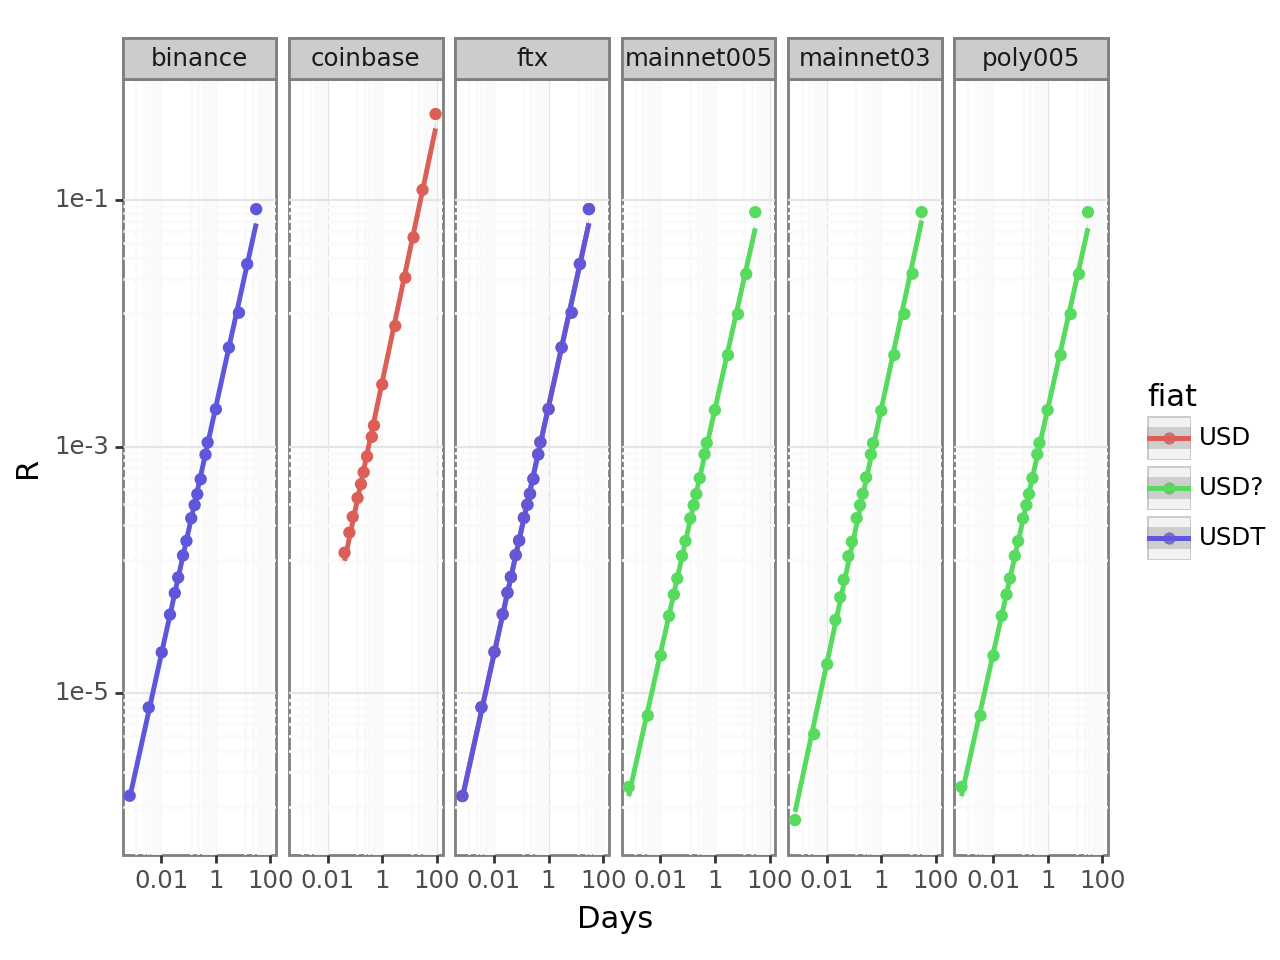

In [549]:
#| label: fig-var
#| fig-cap: "Volatility as a function of log-return horizon"

gp = (ggplot(v,aes("Days","R",color="fiat"))+geom_point()+facet_grid(".~Exch")+
 geom_smooth(method="lm")+scale_x_log10()+scale_y_log10() + theme_bw() )
print(gp)

Looking at the auto-correlation:

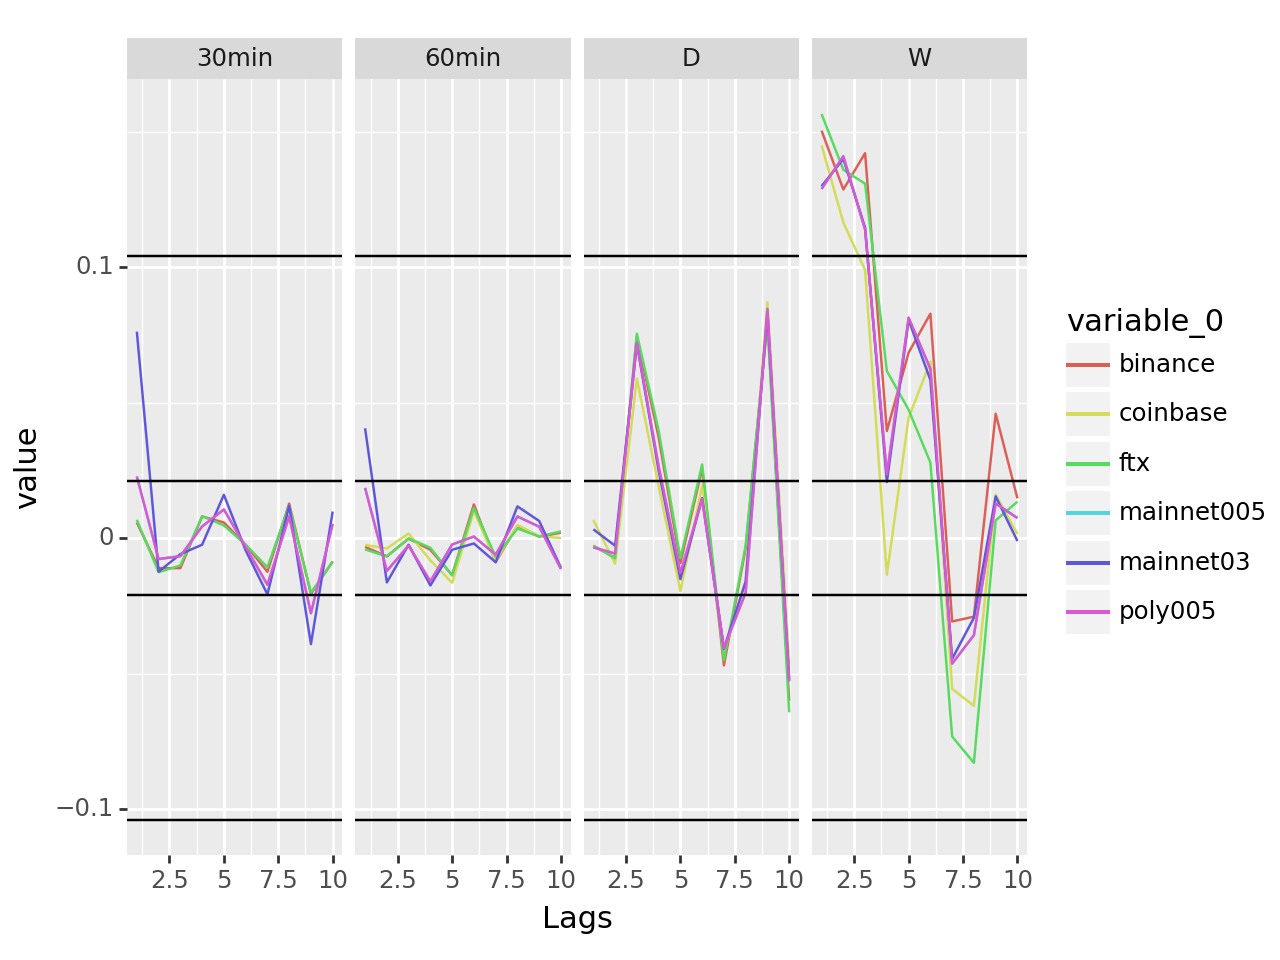

In [550]:
#| label: fig-acf0
#| fig-cap: "Auto-correlation: error bar for 60min"


z   = y[y['dT'].isin(['30min','60min','D','W'])].dropna()
z['Date'] = pd.to_datetime(z['Date'],utc=True)

z1 = z[z['Date']>'2021-07-10']
acf = z1.groupby(['Exch','dT'])['R'].apply(lambda x: st.tsa.stattools.acf(x,nlags=10,fft=False))
dfd = pd.DataFrame(dict(acf)).reset_index()
dfd = dfd.rename(columns={'index':'Lags'})
dfd = dfd.iloc[1:,:]
dfd = dfd.melt('Lags')
eBar = 2/np.sqrt(9000) # 60min
eBarM = 2/np.sqrt(17000) # 30min
eBarD = 2/np.sqrt(370)
gp = (
ggplot(dfd,aes('Lags','value',color='variable_0'))+
geom_line()+facet_grid('.~variable_1')+
geom_hline(yintercept=eBar)+
geom_hline(yintercept=-eBar)+
geom_hline(yintercept=eBarD)+
geom_hline(yintercept=-eBarD)
)
print(gp)

### ETH and SPX

Side by side in order to compare .... that also helps with the limited data availability for ETH is compared to SPX.

#### ACF daily data

Notice that the start and the end of the day is different for both assets. More work is needed.

In [551]:
#spx = pd.read_pickle('../../Data/prices/special/spx.pkl')

coin = "ETH"
cb = y[(y['coin']==coin) & (y['Exch']=="coinbase")]
cb = cb[['Date','Price','dT','R']]
cb['Days'] = cb['dT'].apply(dayUnit)
cb['Asset'] = coin

sp = spx[['Date','Price','dT','R']]
sp['Days'] = sp['dT'].apply(dayUnit)
sp = sp[sp['Days']>=(1/24)]
sp['Asset'] = "SPX"
xx = pd.concat([cb,sp])
xx['Date'] = pd.to_datetime(xx['Date'],utc=True)


In [552]:
spx

,index,Date,Price,dT,logP,R,X,dP,lagP
0,0,2010-01-04 09:31:00+00:00,1122.15,1min,7.023002,NaN,NaN,NaN,NaN
1,1,2010-01-04 09:32:00+00:00,1123.80,1min,7.024471,0.001470,0.001469,1.65,1122.15
2,2,2010-01-04 09:33:00+00:00,1124.23,1min,7.024854,0.000383,0.000383,0.43,1123.80
3,3,2010-01-04 09:34:00+00:00,1124.23,1min,7.024854,0.000000,0.000000,0.00,1124.23
4,4,2010-01-04 09:35:00+00:00,1124.26,1min,7.024880,0.000027,0.000027,0.03,1124.23
...,...,...,...,...,...,...,...,...,...
7981781,7981781,2020-03-31 00:00:00+00:00,2584.59,Q,7.857322,-0.197654,-0.220215,-636.70,3221.29
7981782,7981782,2020-06-30 00:00:00+00:00,3100.29,Q,8.039251,0.199529,0.181929,515.70,2584.59
7981783,7981783,2020-09-30 00:00:00+00:00,3363.00,Q,8.120589,0.084737,0.081338,262.71,3100.29
7981784,7981784,2020-12-31 00:00:00+00:00,3756.07,Q,8.231128,0.116881,0.110540,393.07,3363.00


In [553]:
sx = xx[(xx['Date']>'2016-05-17')&(xx['Date']<'2021-04-01')]
sx = sx[sx['dT']=="D"].dropna()
sx['abs(R)'] = np.abs(sx['R'])
#sx['R*R'] = sx['R']*sx['R']

sx = sx[['Date','Asset','R','abs(R)']].melt(['Date','Asset'])

acf = sx.groupby(['Asset','variable'])['value'].apply(lambda x: st.tsa.stattools.acf(x,nlags=15,fft=False))
#st.tsa.stattools.acf()
dfd = pd.DataFrame(dict(acf)).reset_index()
dfd = dfd.rename(columns={'index':'Lags'})
dfd = dfd.iloc[1:,:]
dfd = dfd.melt('Lags')
eBar = 2/np.sqrt(1000)

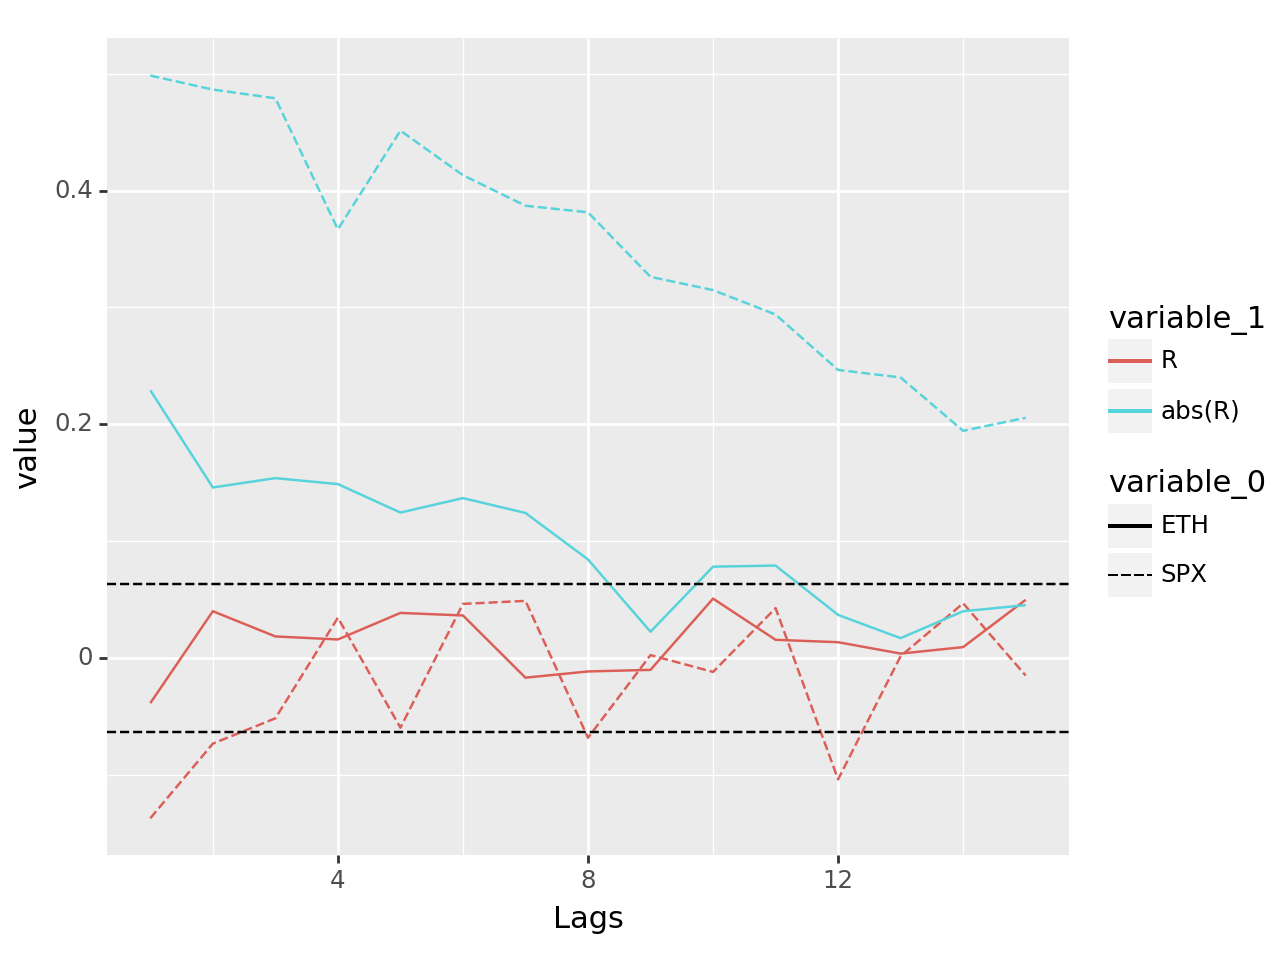

In [554]:
#| label: fig-acfD
#| fig-cap: "ACF day"

gp = (
 ggplot(dfd,aes('Lags','value',color='variable_1',linetype='variable_0'))+geom_line()+
 geom_hline(yintercept=eBar,linetype="dashed")+geom_hline(yintercept=-eBar,linetype="dashed")
)
print(gp)

##### ACF for hour
Notice that this is not that simple because hourly returns for the spx do not run for 24 hours. More work is needed. There is clear seasonality for SPX...

In [555]:
# Hour ....
sx = xx[(xx['Date']>'2016-05-17')&(xx['Date']<'2021-04-01')]
sx = sx[sx['dT']=="60min"].dropna()
sx['abs(R)'] = np.abs(sx['R'])
#sx['R*R'] = sx['R']*sx['R']

sx = sx[['Date','Asset','R','abs(R)']].melt(['Date','Asset'])

acf = sx.groupby(['Asset','variable'])['value'].apply(lambda x: st.tsa.stattools.acf(x,nlags=360,fft=True))
#st.tsa.stattools.acf()
df = pd.DataFrame(dict(acf)).reset_index()
df = df.rename(columns={'index':'Lags'})
df = df.iloc[1:,:]
df = df.melt('Lags')
dfd['Lags'] = np.where(dfd['variable_0']=="SPX",6.5*dfd['Lags'],24*dfd['Lags'])
eBar = 2/np.sqrt(10000) # 48000 ETH and 9000 SPX

ACF of abs(R):

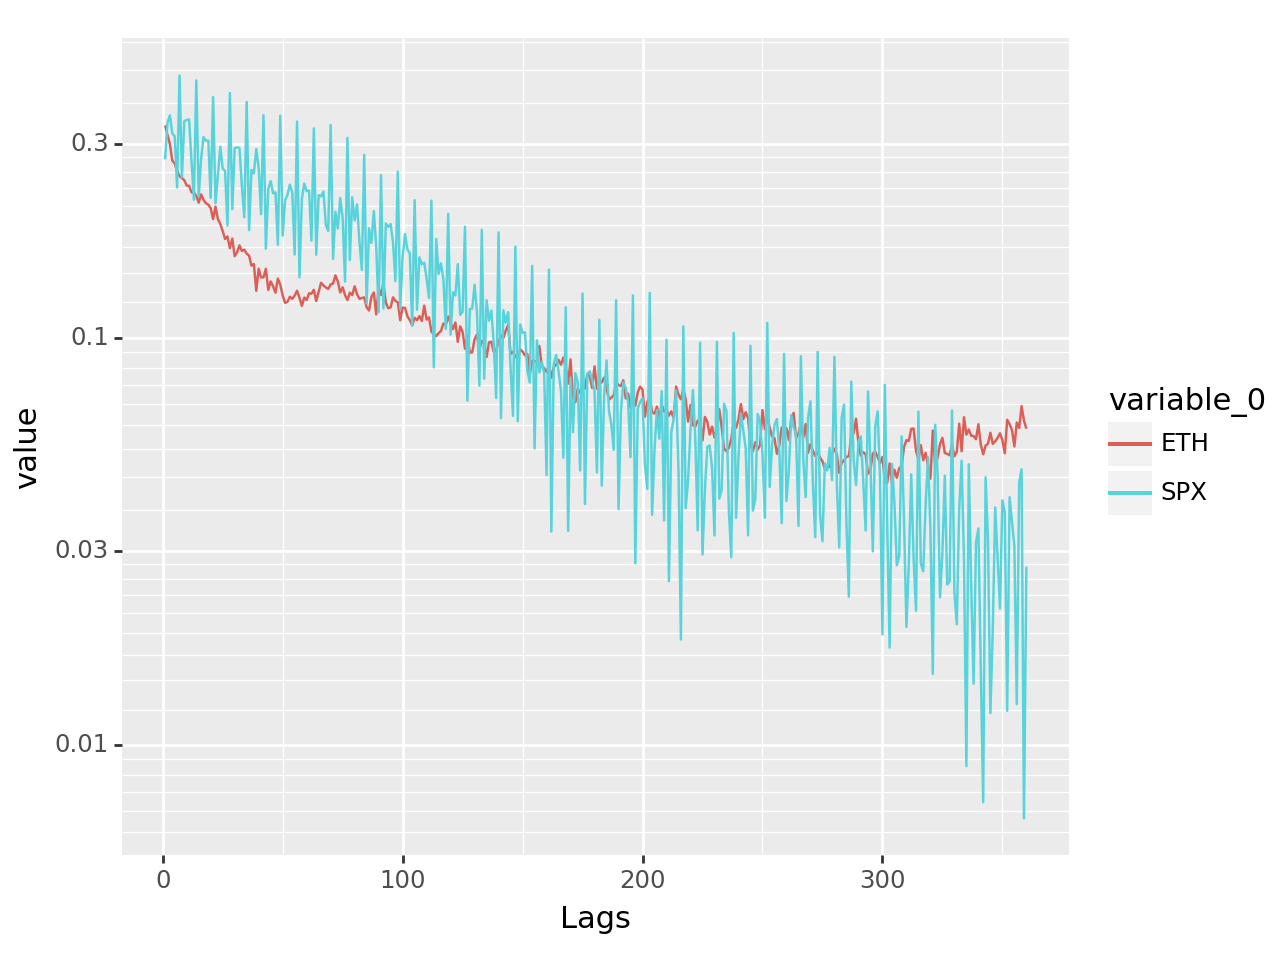

In [556]:
#| label: fig-acfH
#| fig-cap: "ACF hour for abs(R)"

df1 = df[(df["variable_1"]=="abs(R)")&(df["value"]>0)]
gp = (
 ggplot(df1,aes('Lags','value',color='variable_0'))+geom_line()+
 scale_y_log10()
)
print(gp)

ACF of R:

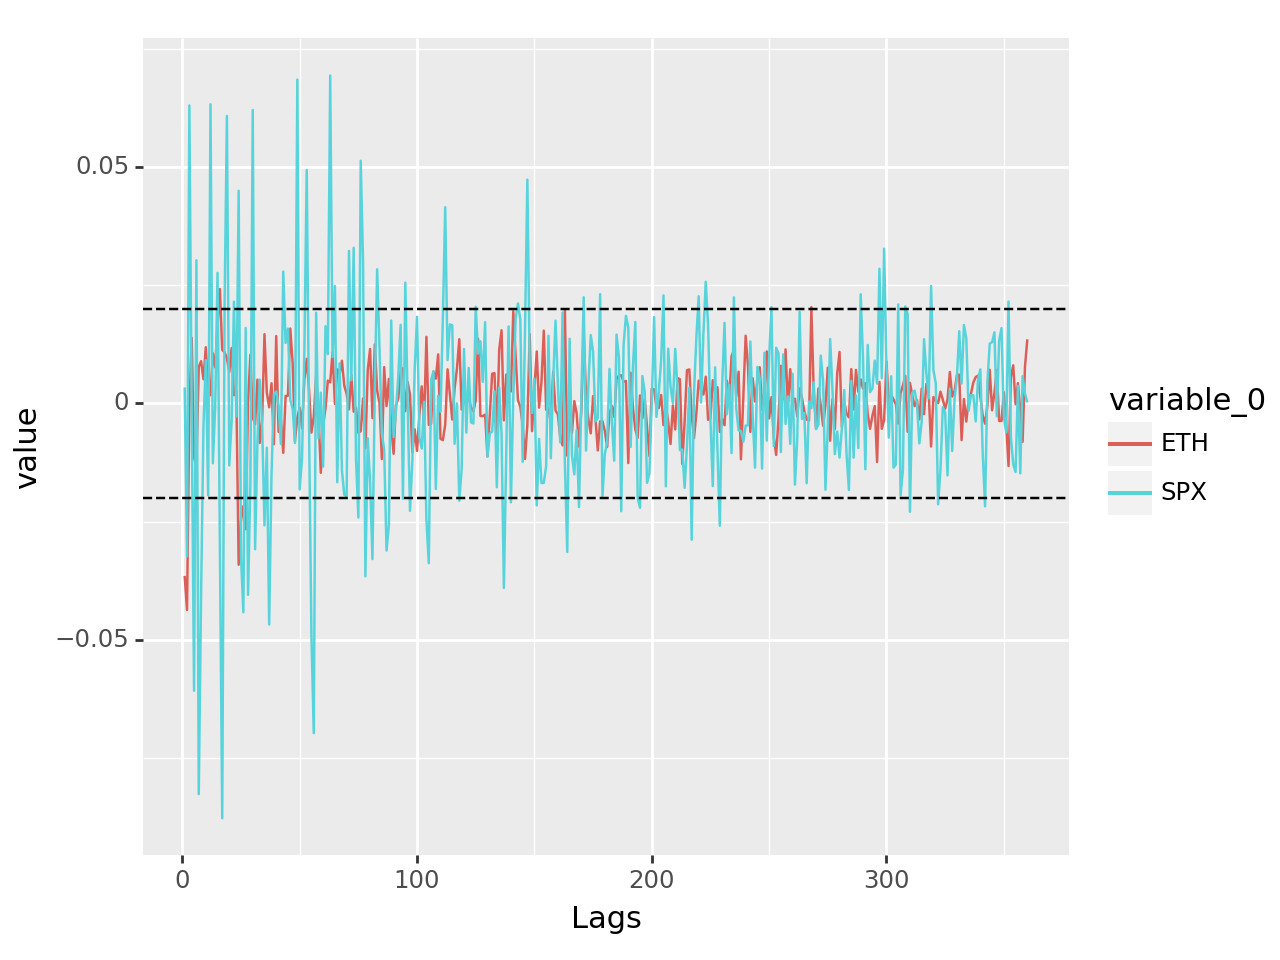

In [557]:
#| label: fig-acfHr
#| fig-cap: "ACF hour for R"

df1 = df[(df["variable_1"]=="R")]
gp = (
 ggplot(df1,aes('Lags','value',color='variable_0'))+geom_line()+
 geom_hline(yintercept=-eBar,linetype="dashed")+
 geom_hline(yintercept=eBar,linetype="dashed")
)
print(gp)

## Time-series

Figure (@fig-ts) shows the time series for ETH and for the SPX index for approximately the same period. 

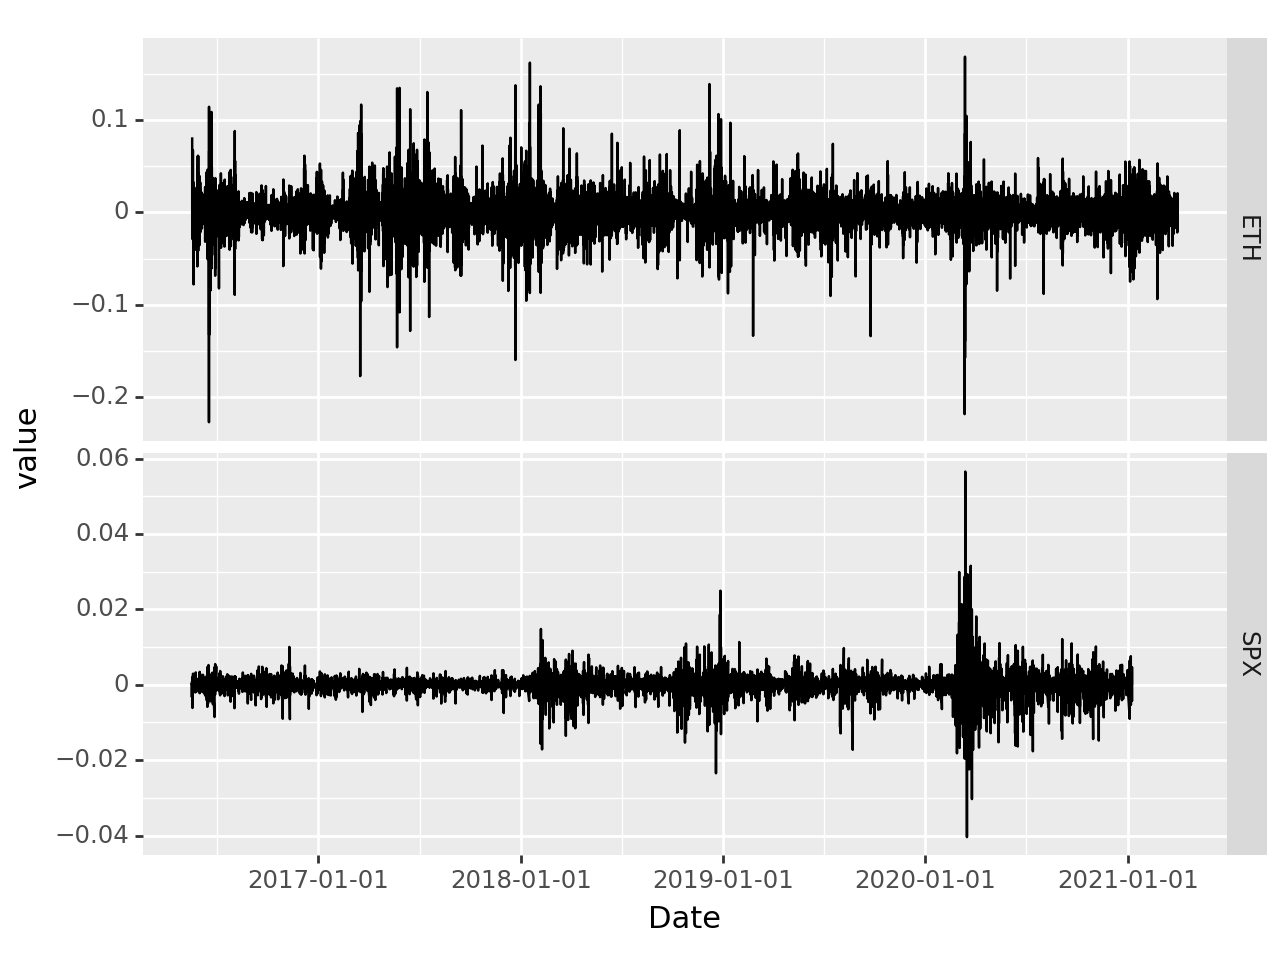

In [558]:
#| label: fig-ts
#| fig-cap: "Returns on a hour interval"

#%% Time series
# Completly different mag for SPX but not so much for ETH
gp = ggplot(sx[sx["variable"]=="R"],aes("Date","value"))+geom_line()+facet_grid("Asset~.",scales="free_y")
print(gp)

## Volume & Volatility pattern

To address here:

* Daily volume pattern is similar to volatility (std). This agrees with traditional finance.
* The weekly volume pattern. Possible graph could show daily pattern over day of the week.
* Need to add EDT and asia time....

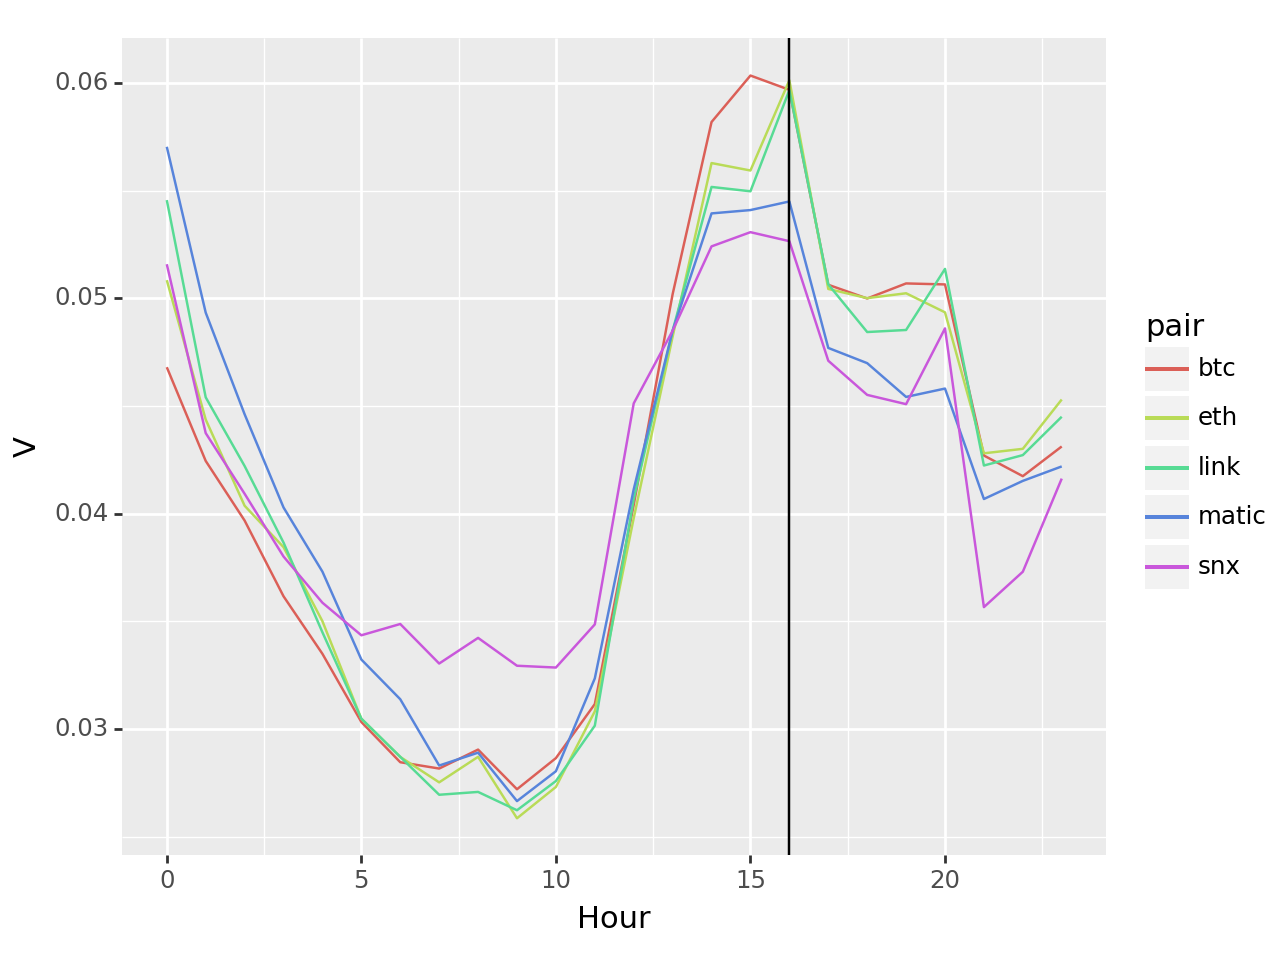

In [559]:
#| label: fig-volsea
#| fig-cap: "Volume seasonality"

df = pd.read_feather('../../Data/prices/kraken/priceHist2.fdr')
df['Date'] = pd.to_datetime(df['hourBin'])
#pd.DatetimeIndex(df['Date']).hour
df['Hour'] = df['Date'].dt.hour
v = df.groupby(['pair','Hour']).agg(m=('Volume',np.mean),s=('Volume',np.std),N=('Volume',len))
sv = v.groupby('pair')['m'].sum()
vv = pd.merge(v.reset_index(),sv.reset_index(),on="pair")

vv['V'] = vv['m_x']/vv['m_y']
vv['E'] = 2*(vv['s']/vv['m_y'])/np.sqrt(vv['N'])

vv1 = vv[vv['N']>=1000]
gp = ggplot(vv1,aes("Hour","V",color="pair"))+geom_line()+geom_vline(xintercept=16)
print(gp)

In [560]:
df.groupby('pair')['Date'].first()

pair
arb     2023-03-23 16:00:00+00:00
btc     2016-01-01 00:00:00+00:00
eth     2016-05-18 00:00:00+00:00
link    2019-06-27 16:00:00+00:00
matic   2021-03-11 17:00:00+00:00
snx     2020-12-15 17:00:00+00:00
Name: Date, dtype: datetime64[ns, UTC]

In [561]:
df['R'] = df.groupby('pair')['Close'].diff()/df.groupby('pair')['Close'].shift(1)
df

,hourBin,Open,High,Low,Close,Volume,pair,rate,exch,Date,Hour,R
0,2016-05-18 00:00:00+00:00,12.500,14.930,12.500,13.000,8.002848,eth,0.0,coin,2016-05-18 00:00:00+00:00,0,NaN
1,2016-05-18 01:00:00+00:00,14.000,14.100,14.000,14.100,15.462483,eth,0.0,coin,2016-05-18 01:00:00+00:00,1,0.084615
2,2016-05-18 02:00:00+00:00,14.000,14.000,14.000,14.000,0.052000,eth,0.0,coin,2016-05-18 02:00:00+00:00,2,-0.007092
3,2016-05-18 17:00:00+00:00,13.600,13.600,13.600,13.600,0.366730,eth,0.0,coin,2016-05-18 17:00:00+00:00,17,-0.028571
4,2016-05-18 18:00:00+00:00,13.270,13.510,13.050,13.510,166.910767,eth,0.0,coin,2016-05-18 18:00:00+00:00,18,-0.006618
...,...,...,...,...,...,...,...,...,...,...,...,...
234474,2024-01-04 12:00:00+00:00,3.578,3.617,3.578,3.617,1715.118387,snx,0.0,coin,2024-01-04 12:00:00+00:00,12,0.014017
234475,2024-01-04 13:00:00+00:00,3.610,3.625,3.590,3.625,18031.536789,snx,0.0,coin,2024-01-04 13:00:00+00:00,13,0.002212
234476,2024-01-04 14:00:00+00:00,3.615,3.662,3.594,3.662,41563.871835,snx,0.0,coin,2024-01-04 14:00:00+00:00,14,0.010207
234477,2024-01-04 15:00:00+00:00,3.657,3.686,3.657,3.686,18601.393369,snx,0.0,coin,2024-01-04 15:00:00+00:00,15,0.006554


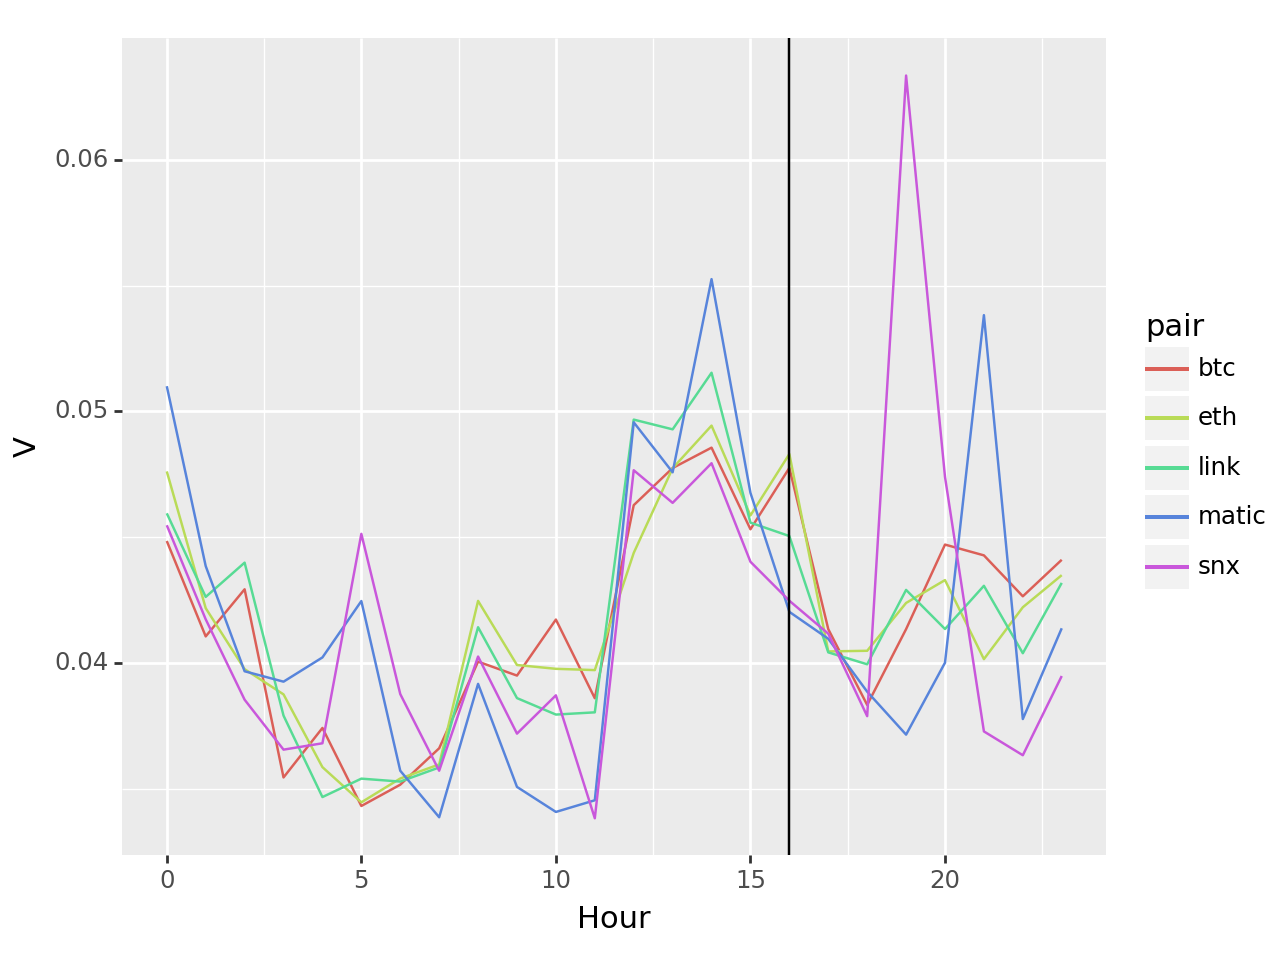

In [562]:
v = df.groupby(['pair','Hour']).agg(m=('R',np.std),N=('Volume',len))
sv = v.groupby('pair')['m'].sum()
vv = pd.merge(v.reset_index(),sv.reset_index(),on="pair")

vv['V'] = vv['m_x']/vv['m_y']
vv1 = vv[vv['N']>=1000]
gp = ggplot(vv1,aes("Hour","V",color="pair"))+geom_line()+geom_vline(xintercept=16)
print(gp)

Looking at different data: looks like we do not have enough data to replicate the figure above. Notice that coinbase replicates because it starts in 2016 ..... but in general it follows volume pattern.

In [563]:
a = x[(x['dT']=='60min')&(x['coin']=='ETH')]
a['R'] = a.groupby('Exch')['Price'].diff()/a.groupby('Exch')['Price'].shift(1)
#a = a[a['Date']>'2021-06-30']

In [564]:
a['hour'] = a['Date'].dt.hour
b = a.groupby(['Exch','hour'])['R'].std().reset_index()
#b[b['Exch']=='coinbase']

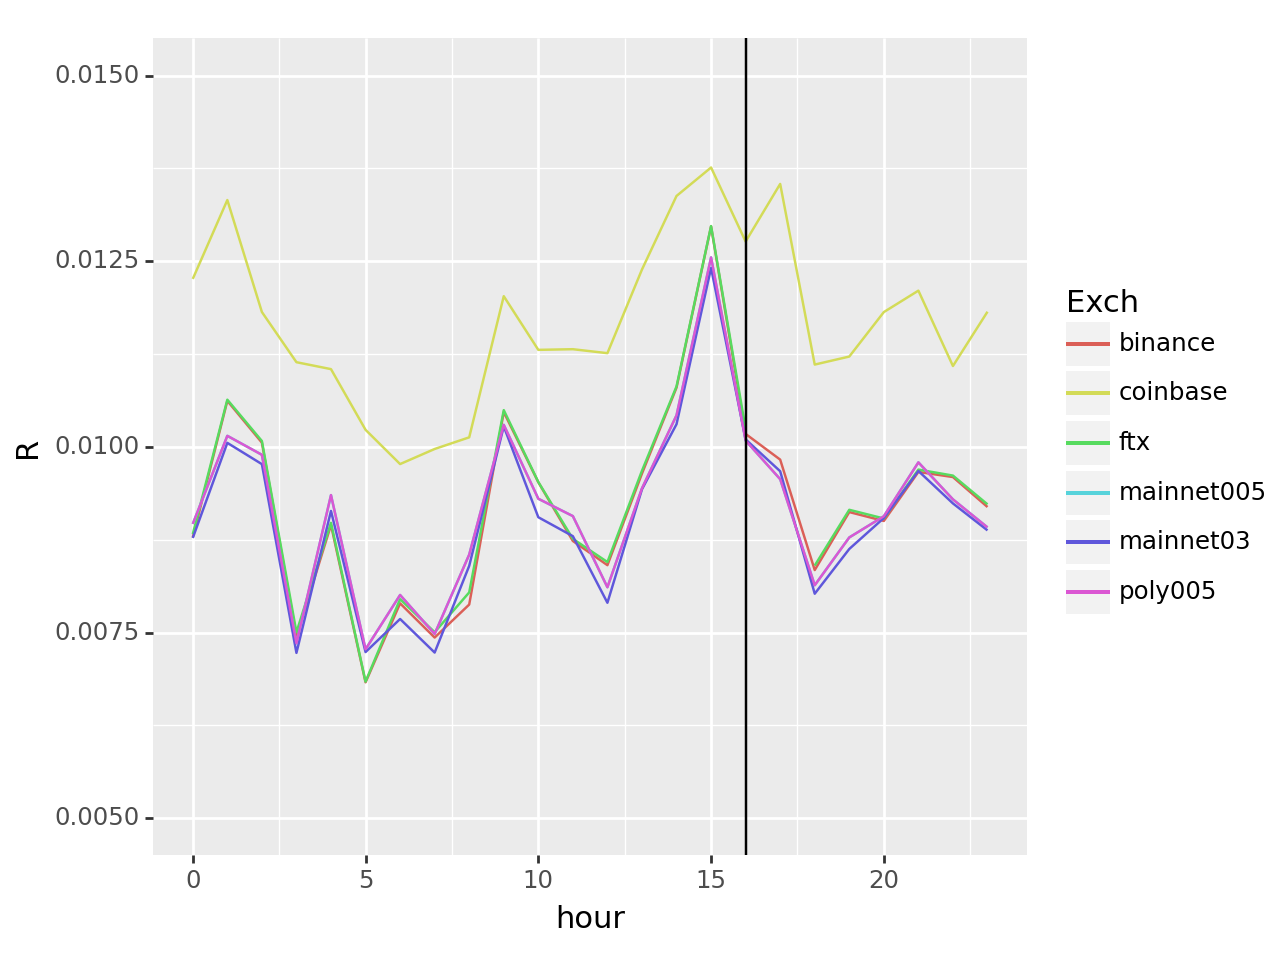

In [565]:
gp0 = ggplot(b,aes("hour","R",color="Exch"))+geom_line()+geom_vline(xintercept=16)+ylim(0.005,0.015)
print(gp0)

In [566]:
a.groupby('Exch')['Date'].first()

Exch
binance      2021-06-30 17:00:00+00:00
coinbase     2016-05-18 01:00:00+00:00
ftx          2021-06-30 17:00:00+00:00
mainnet005   2021-07-10 14:00:00+00:00
mainnet03    2021-07-10 14:00:00+00:00
poly005      2021-07-10 14:00:00+00:00
Name: Date, dtype: datetime64[us, UTC]

## Leverage

TODO:

* Remove returns larger than actual gap. For example, 1H returns should have only 1H values..... this is to avoid weekends etc.
* For daily and higher returns we can keep everything because of the usual convention used (include everything).
* Make sure binance data is binance only....
* bring data up-to-date
* Compare different exchanges
* Cut the coin data at the EDT spx times

There are several stats that can be used to show the leverage effect. Here we show only one way: the cross-correlation between the abs(R) vs R.
Possible results so far: leverage effect is present only for less than 1 Day. Leverage effect is not true for all tokens. In fact increase in price leads to future vol increase sometimes. Also quite significant: vol increase leads to increase in price....

In [567]:
def prep_lev(x,var_use='R'):
    y = x.dropna().copy()
    y['lagR']= y.groupby('dT')[var_use].shift(1)
    y['absR']= np.abs(y[var_use])
    return y

def lev0(x,var_use='R'):
    z = prep_lev(x,var_use)
    return z.dropna().groupby('dT')[['lagR', 'absR']].corr().iloc[0::2, -1]
    

In [568]:
def xcross(x,what='D',var_use='R'):
    y = prep_lev(x,var_use)
    a = y[y['dT']==what].dropna()
    z = plt.xcorr(a['lagR']-np.mean(a['lagR']),a['absR']-np.mean(a['absR']),maxlags=20)
    plt.hlines(y=3/np.sqrt(a.shape[0]),xmin=-10,xmax=10,color='red',linestyles='dashed')
    plt.hlines(y=-3/np.sqrt(a.shape[0]),xmin=-10,xmax=10,color='red',linestyles='dashed')
    plt.show()
    return z

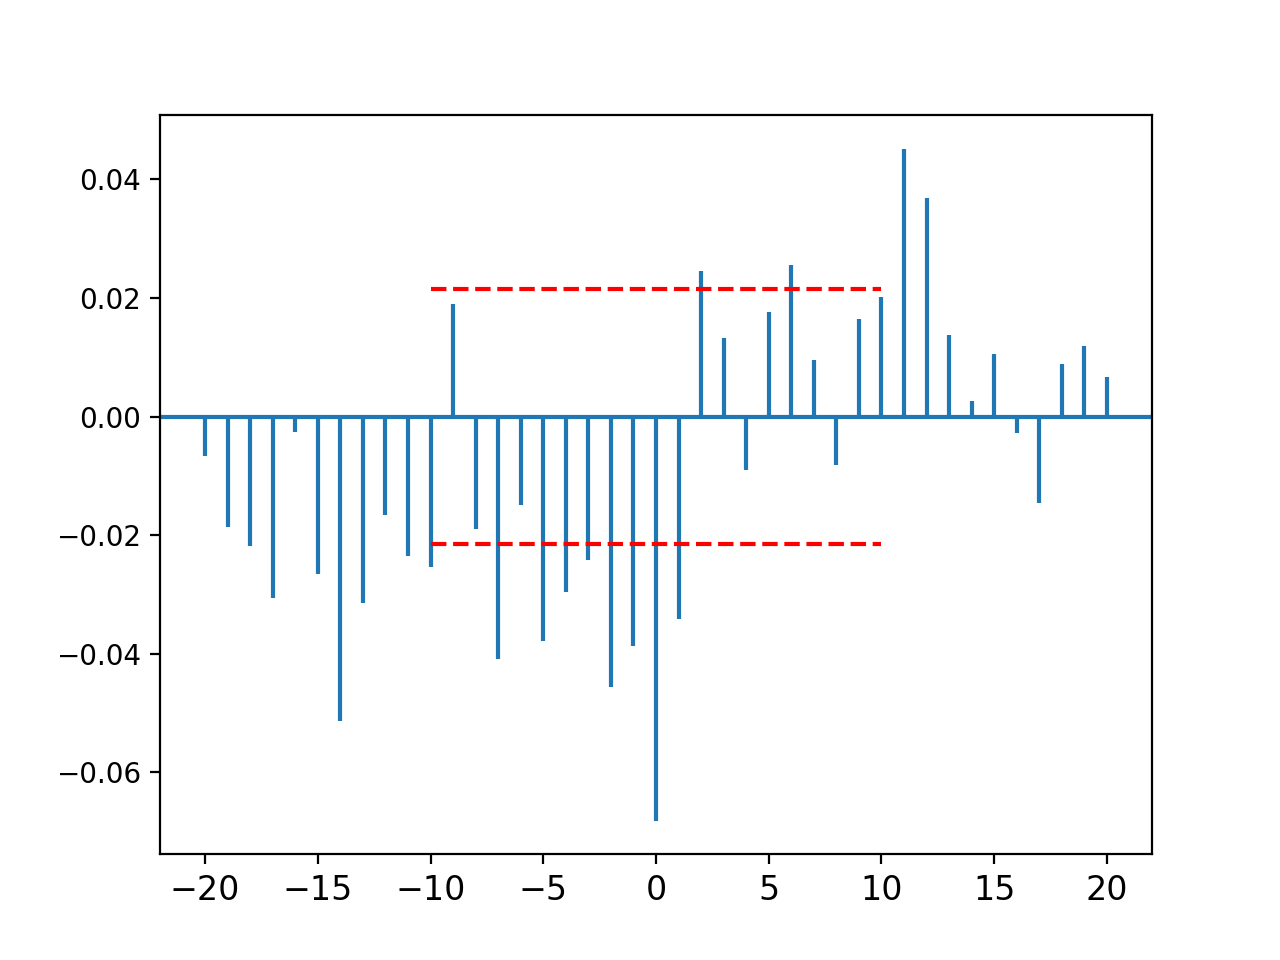

In [569]:
_=xcross(spx,what='60min')

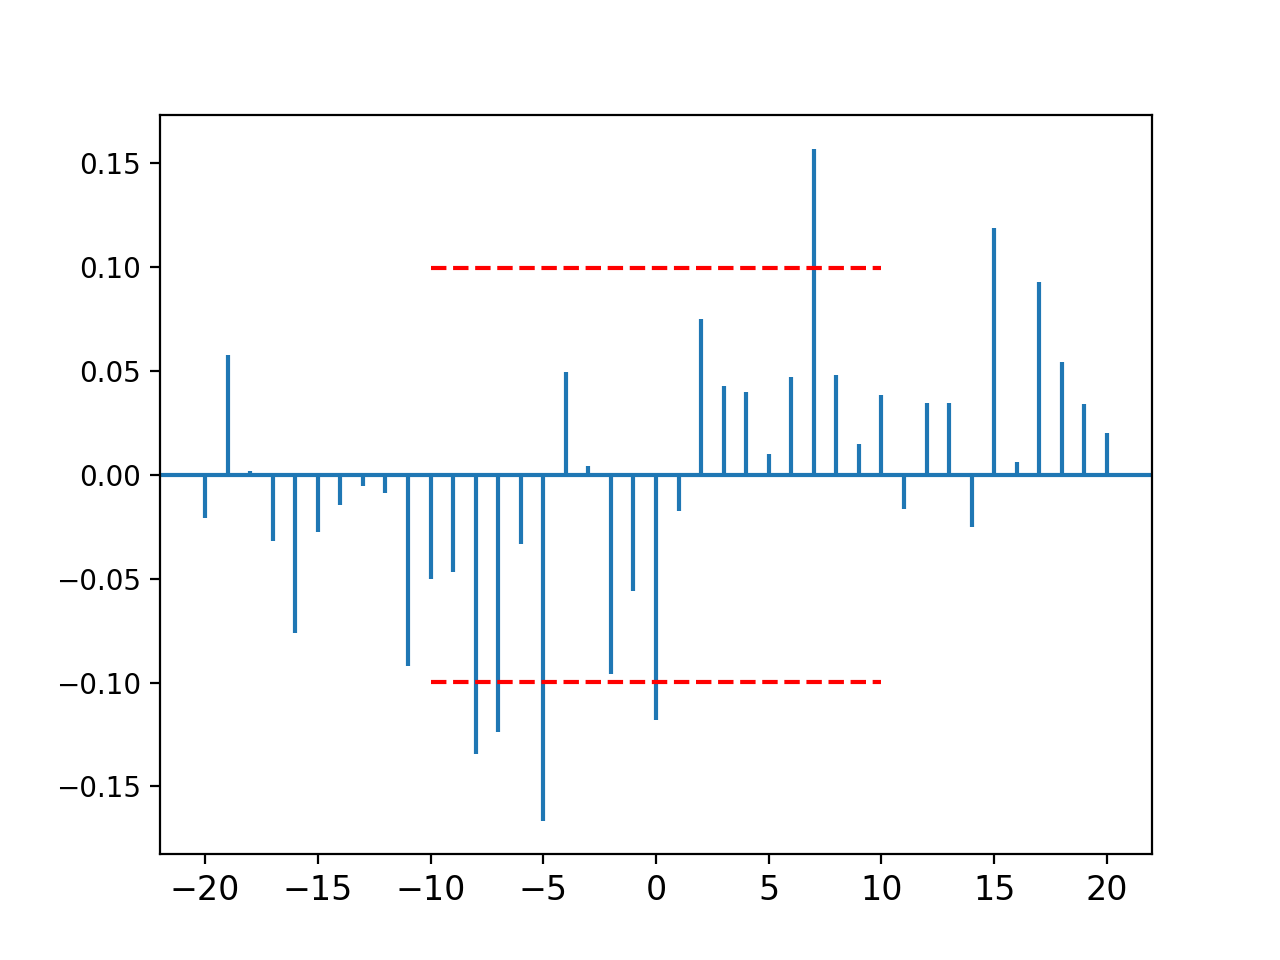

In [570]:
_=xcross(spx[spx['Date']>='2016-06-01'],what='D') # there is still some leverage effect but not as clear.... however compared to ETH, this is clear....

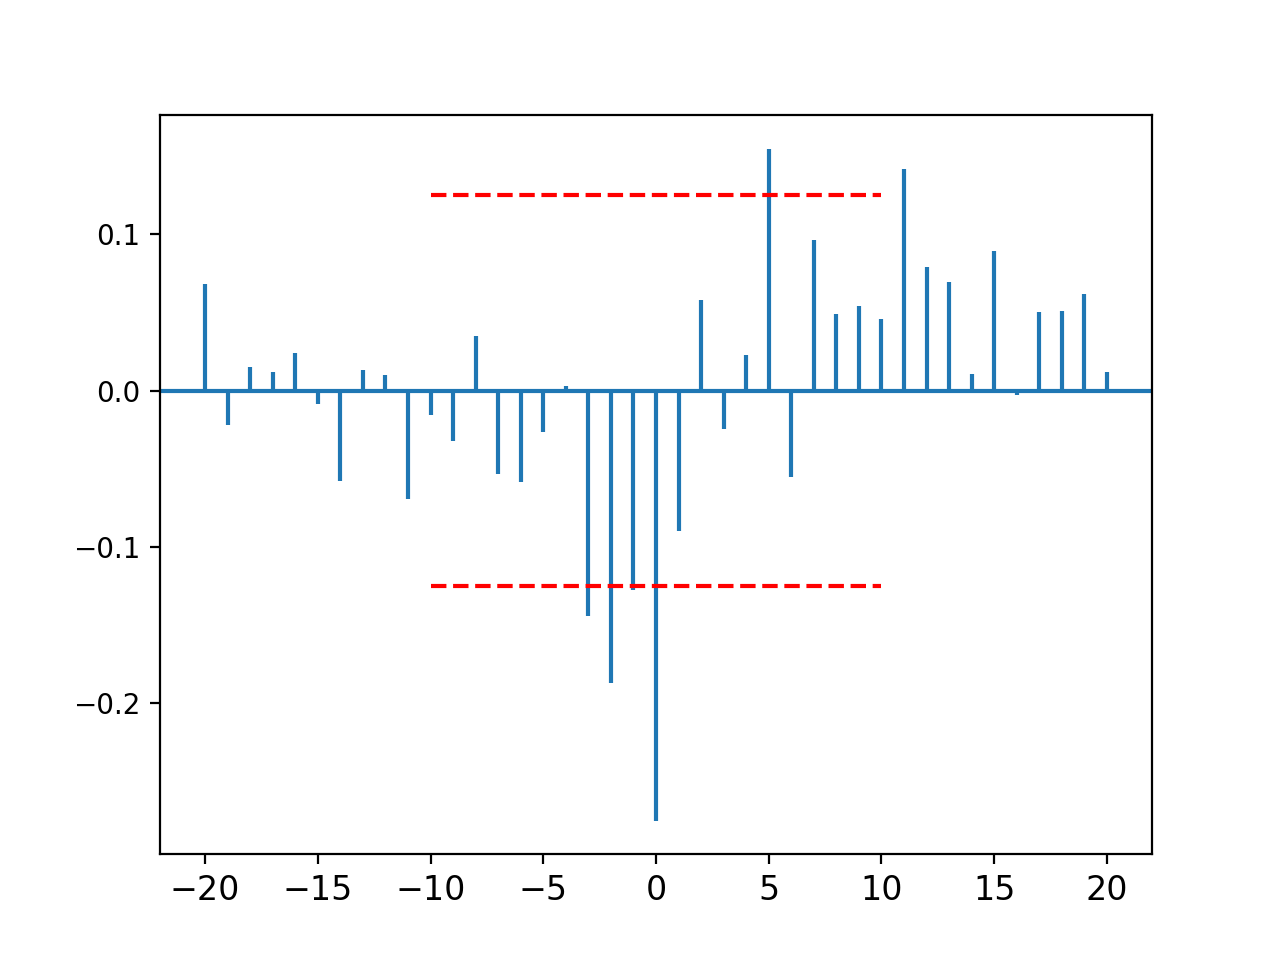

In [571]:
_=xcross(spx,what='W')

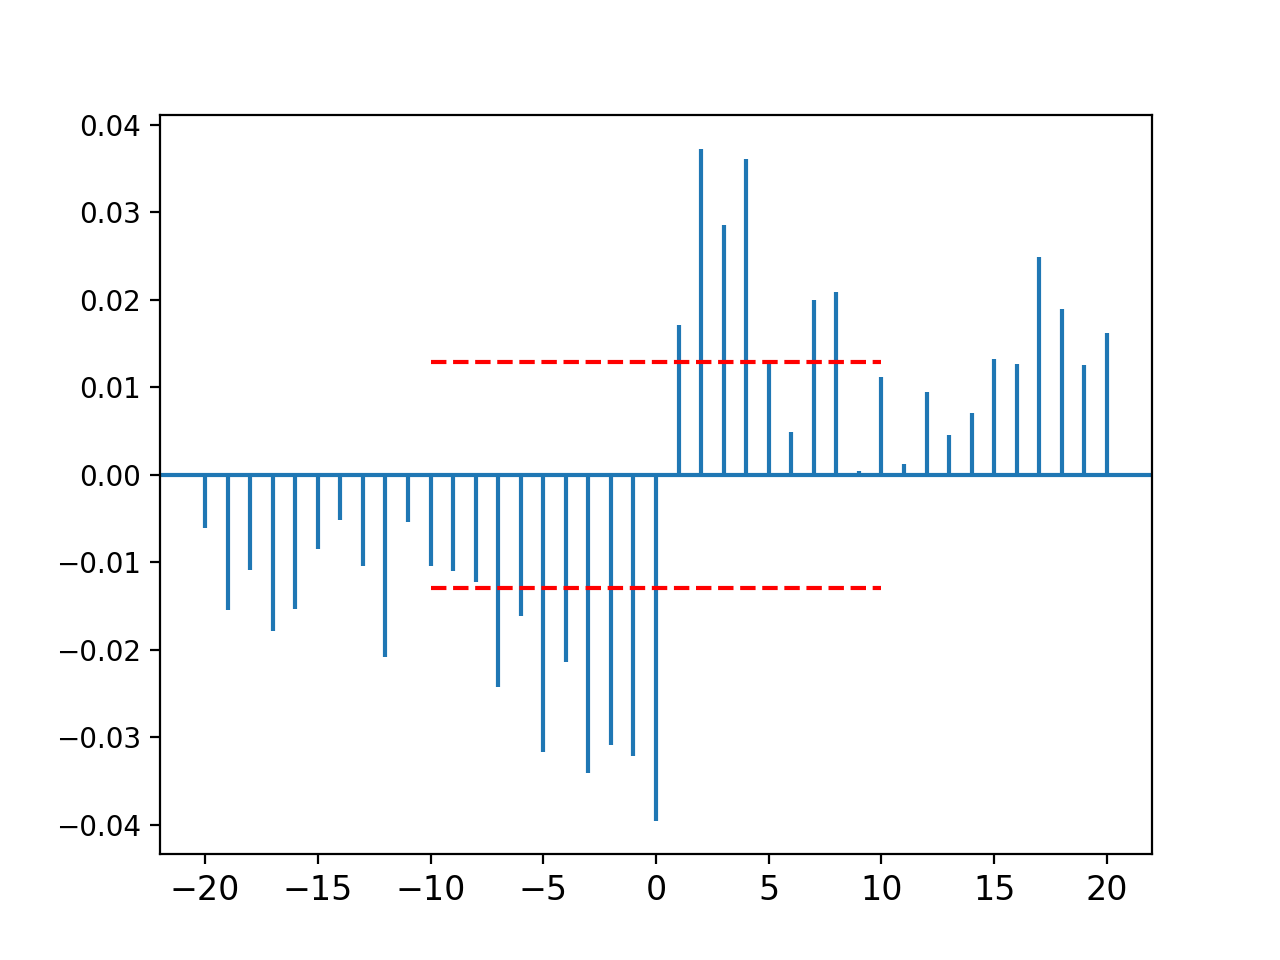

In [572]:
_=xcross(r,var_use='rr',what='60min')

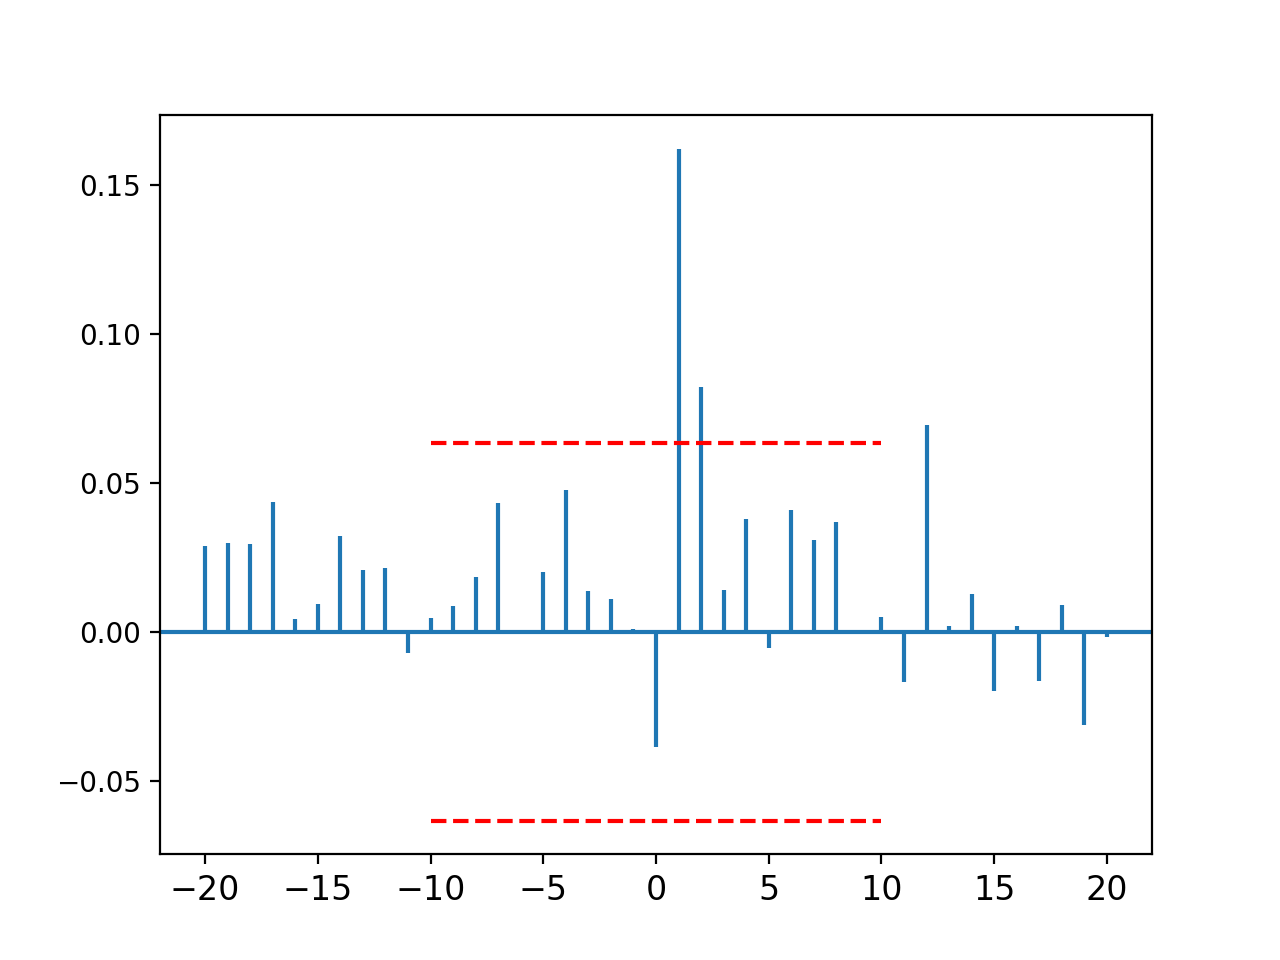

In [573]:
_=xcross(r,var_use='rr',what='D') # NO LEVERAGE EFFECT FOR DAILY DATA????

In [574]:
xc = x[x['Exch']=='coinbase']

In [575]:
a=xc.groupby(['dT','coin'])['Price'].count()

In [576]:
b = a[('M',)]
ptr = b>(3*12)
b[ptr].index.values.tolist() # at least 3 years

['BCH', 'BTC', 'EOS', 'ETC', 'ETH', 'LINK', 'LTC', 'REP', 'XLM', 'ZRX']

In [577]:
xc2021 = xc[(xc['dT']=='60min') & (xc['Date']>'2021-05-01')]

In [578]:
fdate = xc2021.groupby('coin')['Date'].first()
ptr = fdate>'2021-05-02'

In [579]:
d3y = fdate[~ptr].index.values.tolist()

## Time reversal asymmetry

Time reversal asymmetry (TRA) has been reported for a series of traditional assets such as currencies [@Z2009] and stocks [@CHICHEPORTICHE2014174],[@Z2014]. TRA is generally measured as the difference between the correlation of realized volatility and historical volatility and the reverse (historical vs realized). It has been reported the correlation of historical to realized (past to future) is higher than the correlation of realized to historical (future to past)[@CHICHEPORTICHE2014174]. In what follows, we measure TRA using an modified indicator proposed by [@CHICHEPORTICHE2014174] adapted to our data. 

Our qualitative results for the SPX concur with the literature. TRA effect for ETH (coinbase) is less dramatic with a very fast decay if we compare to the SPX. It also appears that the SPX effect is smaller for more recent data.

In [581]:
def time_rev_day(spx,dT='60min',days=np.arange(1,22)):
    a =  spx[spx['dT']==dT].copy()
    a['day'] = a['Date'].dt.date
    a['rD'] = a.groupby('day')['Price'].diff()/a.groupby('day')['Price'].shift(1)
    b = pd.DataFrame(a.groupby('day')['rD'].std())
    b['open'] = a.groupby('day')['Price'].first().to_numpy()
    b['close'] = a.groupby('day')['Price'].last().to_numpy()
    b['R'] = (b['close']-b['open'])/b['open']
    b['S'] = b['rD']-np.mean(b['rD'])
    c_mat = np.zeros([len(days),2])
    for d in days:
        tb = b.copy()
        #tb= b
        tb['h'] = tb['R'].shift(d)
        tb['f'] = tb['R'].shift(-d)
        tb = tb.dropna()
        c_mat[d-1,0] = np.corrcoef(np.abs(tb['h']),tb['rD'])[0,1]
        c_mat[d-1,1] = np.corrcoef(np.abs(tb['f']),tb['rD'])[0,1]
        #c_mat[d-1,0] = np.corrcoef(tb['h']**2,tb['rD']**2)[0,1]
        #c_mat[d-1,1] = np.corrcoef(tb['f']**2,tb['rD']**2)[0,1]
    return c_mat

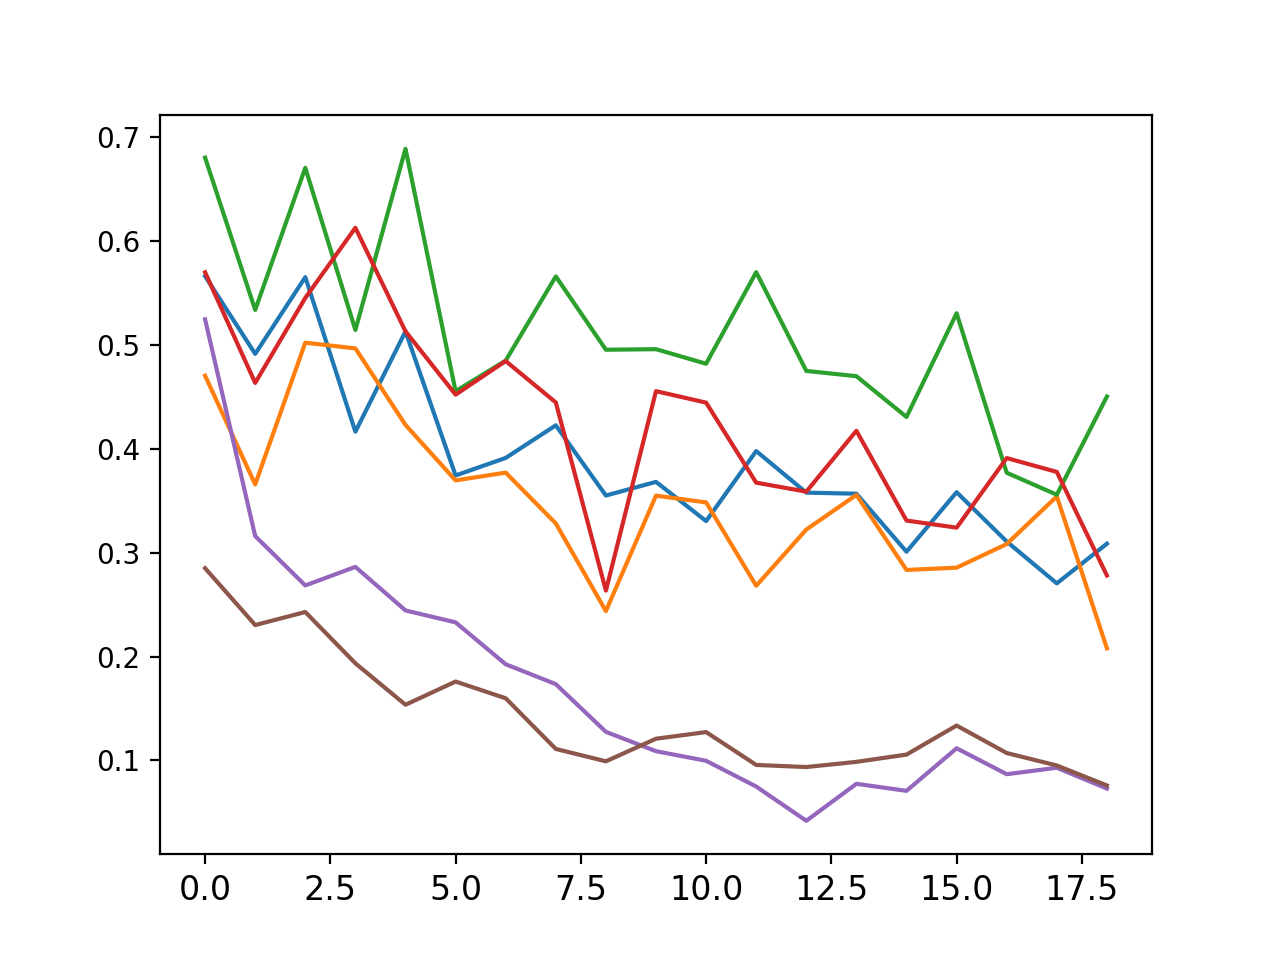

In [582]:
c_eth = time_rev_day(r,dT='60min',days=np.arange(1,20))
c_spx = time_rev_day(spx[spx['Date']>'2016-07-01'],dT='60min',days=np.arange(1,20))
c_spx0 = time_rev_day(spx,dT='60min',days=np.arange(1,20))
plt.plot(c_spx0)
plt.plot(c_spx)
plt.plot(c_eth)
plt.show()

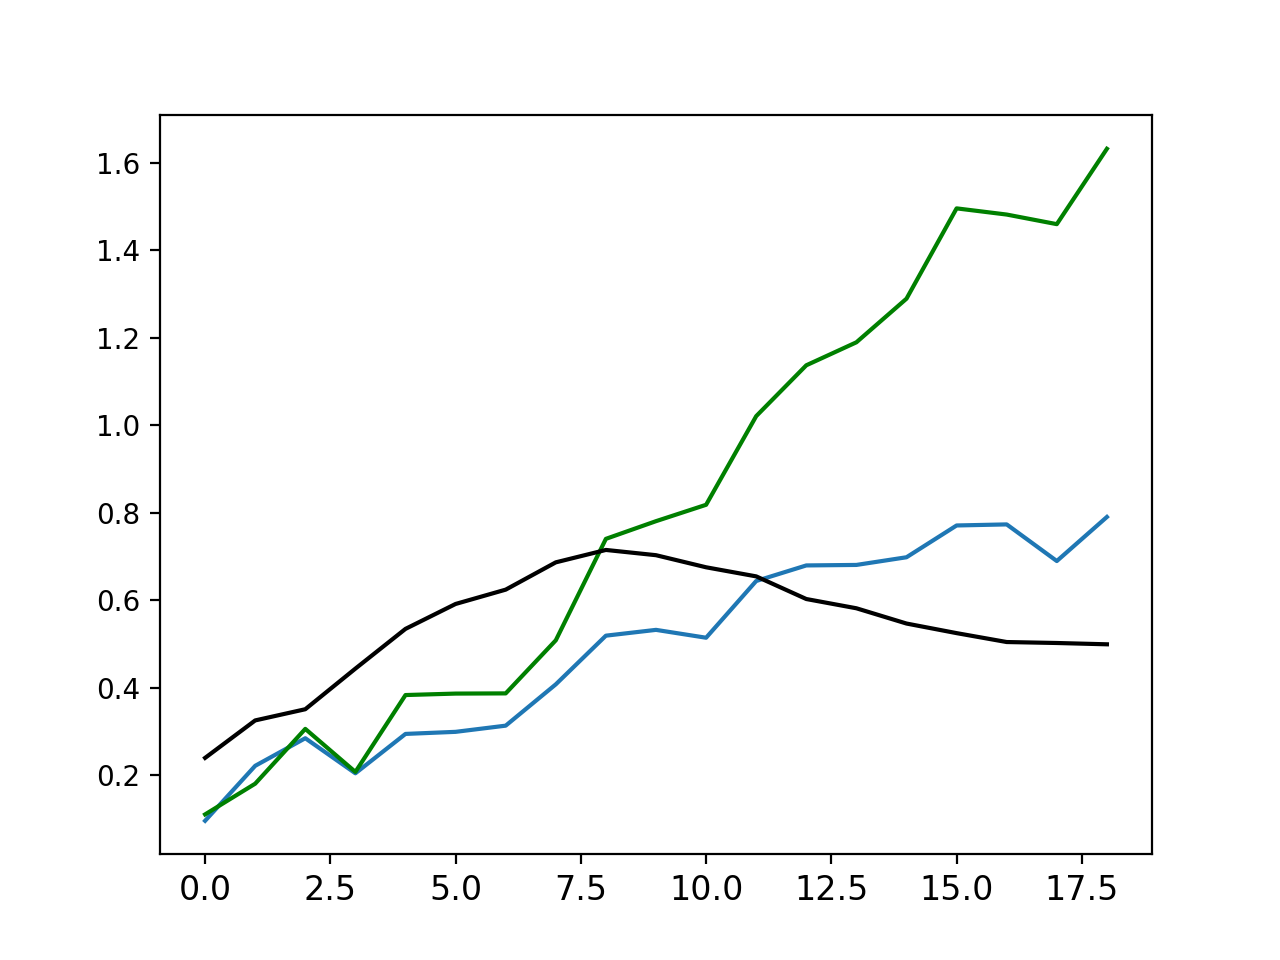

In [583]:
plt.plot(np.cumsum(c_spx0[:,0]-c_spx0[:,1]))
plt.plot(np.cumsum(c_spx[:,0]-c_spx[:,1]),'g')
plt.plot(np.cumsum(c_eth[:,0]-c_eth[:,1]),'k')
plt.show()

## Uniswap price process

More work needed but this should be presented and more theoretical work can be added. See next figure for a possible illustration of the process.

![Uniswap Price process](newplot.png)

In [584]:
#arb = pd.read_csv('C://Users//14152//Documents//Tata//Projects//Data//stylePaper//oneSecArb/WETH_USDC_arb_3000_arrival_1sec.csv')

In [585]:
#arb.head(20)

In [586]:
#100*np.sum(arb['order']>5)/len(arb['order'])

In [587]:
#pd.to_datetime(arb['datetime']).diff().mean()

In [588]:
#p = pd.read_csv('C://Users//14152//Documents//Tata//Projects//Data//stylePaper//oneSecArb/WETH_USDC_arb_3000_price_1sec.csv')

In [589]:
#p.tail(10000).set_index('datetime')['price'].plot()
#plt.show()

## Correlation matrix

This section follows closely [@Amaral2002]. I have downloaded 4000 stocks from yahoo and I have tried to recreate the results presented in 2002. Qualitatively the results for stocks are the same but quantitatively not so much. It is interesting to notice an substantial increase in the average correlation between stocks which has been noted in several studies.

This section takes 160 tokens from coinbase (i have removed stable coins) which have history for about one year and then calculates the correlation matrix on hourly returns. The results are:

* One large eigenvalue indicating the "market". This results is in line with stocks.
* Contrary to stocks other eigenvalues are less significant but there are few which might be above noise.
* Correlations are larger than stocks (see distribution plot).
* Eigenvector associated with large eigenvalue is always positive (again, as expected).
* Eigenvalue distribution resembles MP rule but agreement is not as net as [@Amaral2002].

TODO:

Correlation analysis of a smaller subset of tokens. I have started plotting but still to be completed.



In [590]:
xc2021 = xc[(xc['dT']=='60min') & (xc['Date']>'2021-05-01')]
xc2021

,Date,Price,dT,Exch,coin,fiat
4349648,2021-05-01 01:00:00+00:00,5.677000,60min,coinbase,1INCH,USD
4349649,2021-05-01 02:00:00+00:00,5.650000,60min,coinbase,1INCH,USD
4349650,2021-05-01 03:00:00+00:00,5.682000,60min,coinbase,1INCH,USD
4349651,2021-05-01 04:00:00+00:00,5.701000,60min,coinbase,1INCH,USD
4349652,2021-05-01 05:00:00+00:00,5.636000,60min,coinbase,1INCH,USD
...,...,...,...,...,...,...
6151274,2022-07-15 21:00:00+00:00,0.292247,60min,coinbase,ZRX,USD
6151275,2022-07-15 22:00:00+00:00,0.293611,60min,coinbase,ZRX,USD
6151276,2022-07-15 23:00:00+00:00,0.293807,60min,coinbase,ZRX,USD
6151277,2022-07-16 00:00:00+00:00,0.294156,60min,coinbase,ZRX,USD


In [591]:
L1 = ['BTC','ETH','BNB','SOL','XRP','ADA','AVAX','DOT','TRX','MATIC','LTC','BCH','ATOM','ALGO','RUNE','FTM','GNO']
L2 = ['OP','ARB']
Oracle = ['LINK']
DeFi = ['UNI','INJ','AAVE','SNX','MRK','OSMO','FXS','CRV','GMX','CVX','BAL']
Gaming =['SAND','AXS']
Shitcoin = ['DOGE','SHIB','PEPE']
Stable = ['USDT','USDC','DAI','BUSD','FRAX','LUSD','MIM'] 
ourList = L1+L2+Oracle+Gaming+Shitcoin+Stable
len(ourList)

32

In [592]:
# compare to stocks....
S0 = pd.read_csv('C://Users//14152//Documents//Tata//QuantWork//MovingAverages/close2023.csv')
S0['Date'] = pd.to_datetime(S0['Date'])
S0 = S0.set_index('Date')

In [593]:
def filter_data(xc2021,nNa=0.75,rm_list = ['DAI','PAX','MUSD']):
    a = xc2021.groupby(['Date','coin'])['Price'].mean().reset_index()
    b = pd.pivot(a,index='Date',columns='coin',values='Price')
    n = np.sum(b.isna())/b.shape[0]
    select_c = n[n<nNa].index.to_list()
    select_c = np.setdiff1d(select_c,rm_list)
    bb = b[select_c].dropna()
    # return matrix
    rb = (bb-bb.shift(1))/bb.shift(1)
    return bb,rb

In [594]:
def cleanS(S0,minS=50,maxC=0.9):
    ptr = S0.iloc[-1,:]>minS
    S=S0.loc[:,ptr]
    R = S.diff()/S.shift(1)
    csa = R.corr()
    ptr = np.max(np.tril(csa,-1),axis=1)<maxC
    R = R[csa.columns[ptr]]
    return R.corr(),R

In [595]:
_,rb = filter_data(xc2021,nNa=0.75,rm_list = ['DAI','PAX','MUSD','WBTC']+Stable)
rb.shape

(1154, 160)

In [596]:
import random
_,H = cleanS(S0,maxC=0.9,minS=50) #217
random_numbers = random.sample(range(H.shape[1]),rb.shape[1])
cs = H.iloc[-rb.shape[0]:,random_numbers].corr()
cs.shape

(160, 160)

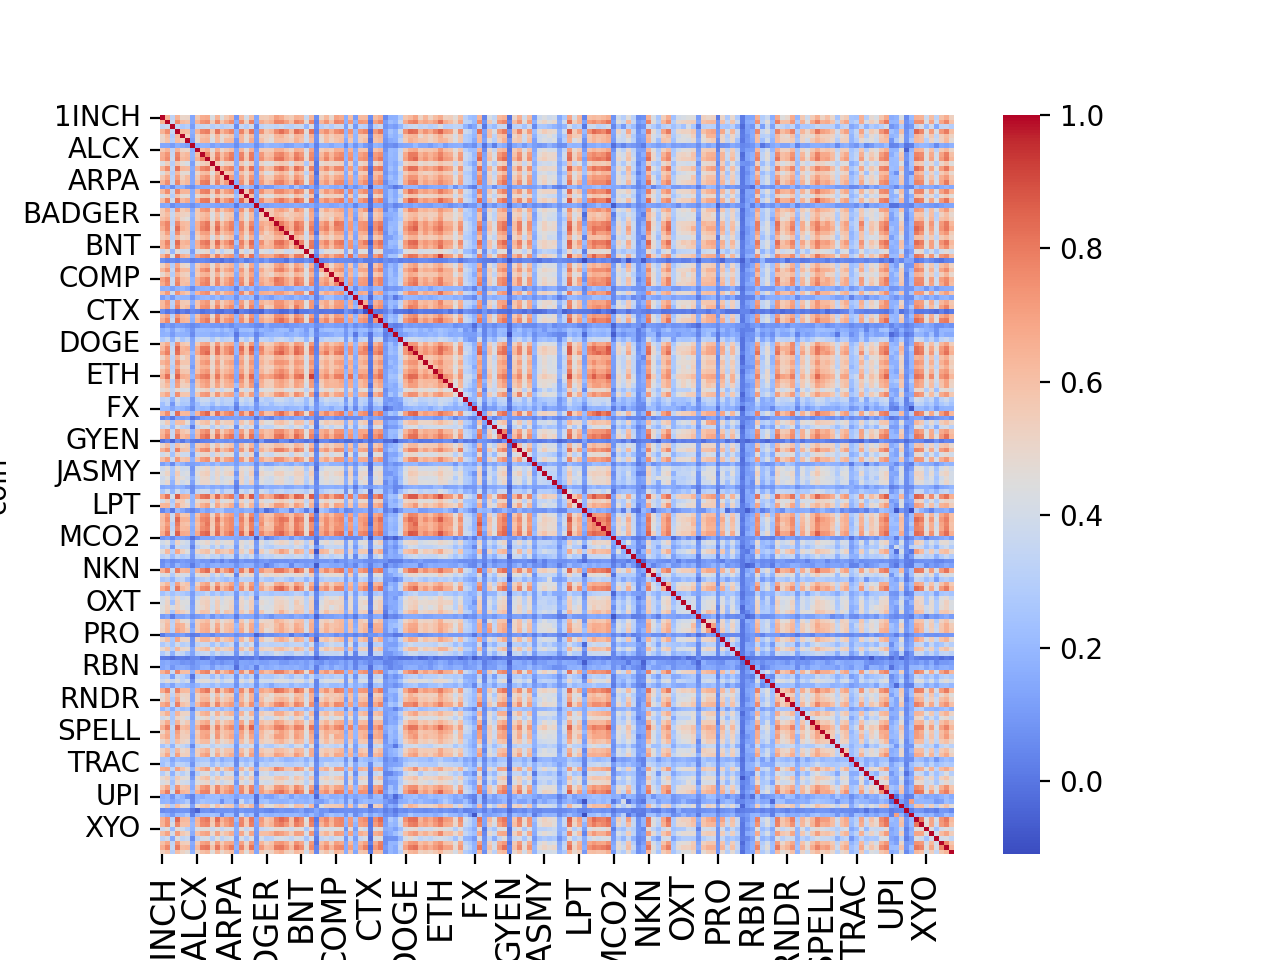

(160, 160)

In [597]:
cb = rb.corr()
sns.heatmap(cb,annot=False,cmap='coolwarm')
plt.show()
cb.shape

In [598]:
_,rp = filter_data(xc2021,nNa=0.8,rm_list = Stable)
#print(rp)
print(len(np.intersect1d(rp.columns,ourList)))

15


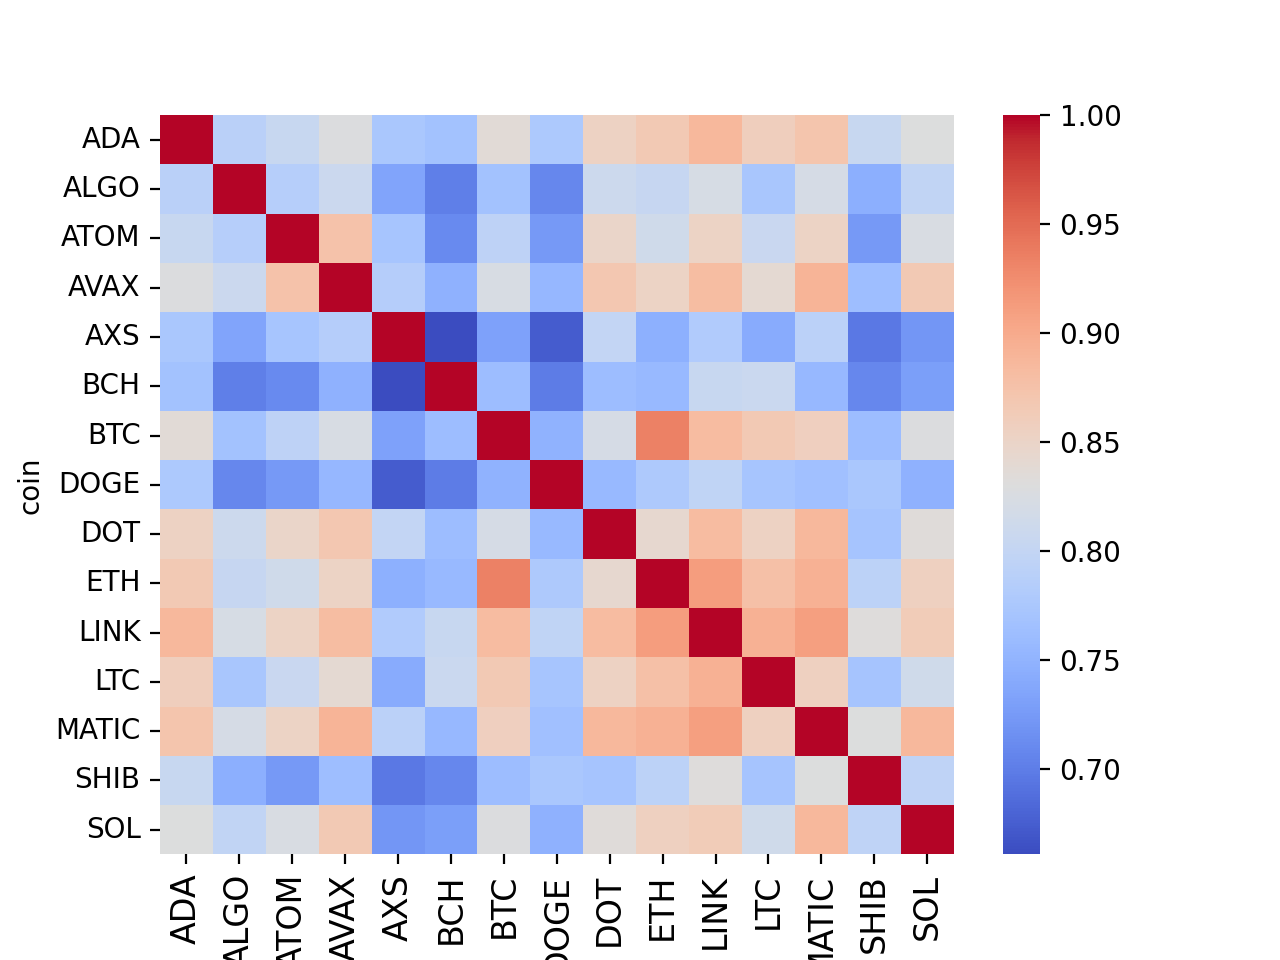

(15, 15)

In [599]:
cb2 = rp[np.intersect1d(rp.columns,ourList)].corr()
sns.heatmap(cb2,annot=False,cmap='coolwarm')
plt.show()
cb2.shape

First look at distribution of correlation elements....

In [600]:
df = rb.reset_index().copy()
for col in df.columns:
    df[col] = df[col].sample(frac=1).reset_index(drop=True)
#df = df.set_index('Date')
df
cn0 = df.iloc[:,1:].corr()
eigenvalues_e0,eigenvectors_e0 = np.linalg.eig(cn0)
#cn0

In [601]:
e_c = []
nn = 500
for i in range(nn):
    #X = np.random.normal(0,1,size=(6400, 1000))
    X = np.random.normal(0,1,size=rb.shape)
    cn = pd.DataFrame(X).corr()
    #print(cn.shape)
    eigenvalues_e,eigenvectors_e = np.linalg.eig(cn)
    e_c.append(eigenvalues_e)
    #if i==0:
    #    e_c = eigenvalues_e
    #else:
    #    e_c += eigenvalues_e
#e_c /= nn
m_ec = np.mean(np.array(e_c),axis=0)
s_ec = np.std(np.array(e_c),axis=0)
q_ec2 = m_ec+3*s_ec/np.sqrt(nn)
q_ec1 = m_ec-3*s_ec/np.sqrt(nn)

In [602]:
q_ec3 = np.quantile(np.array(e_c),q=0.99,axis=0)

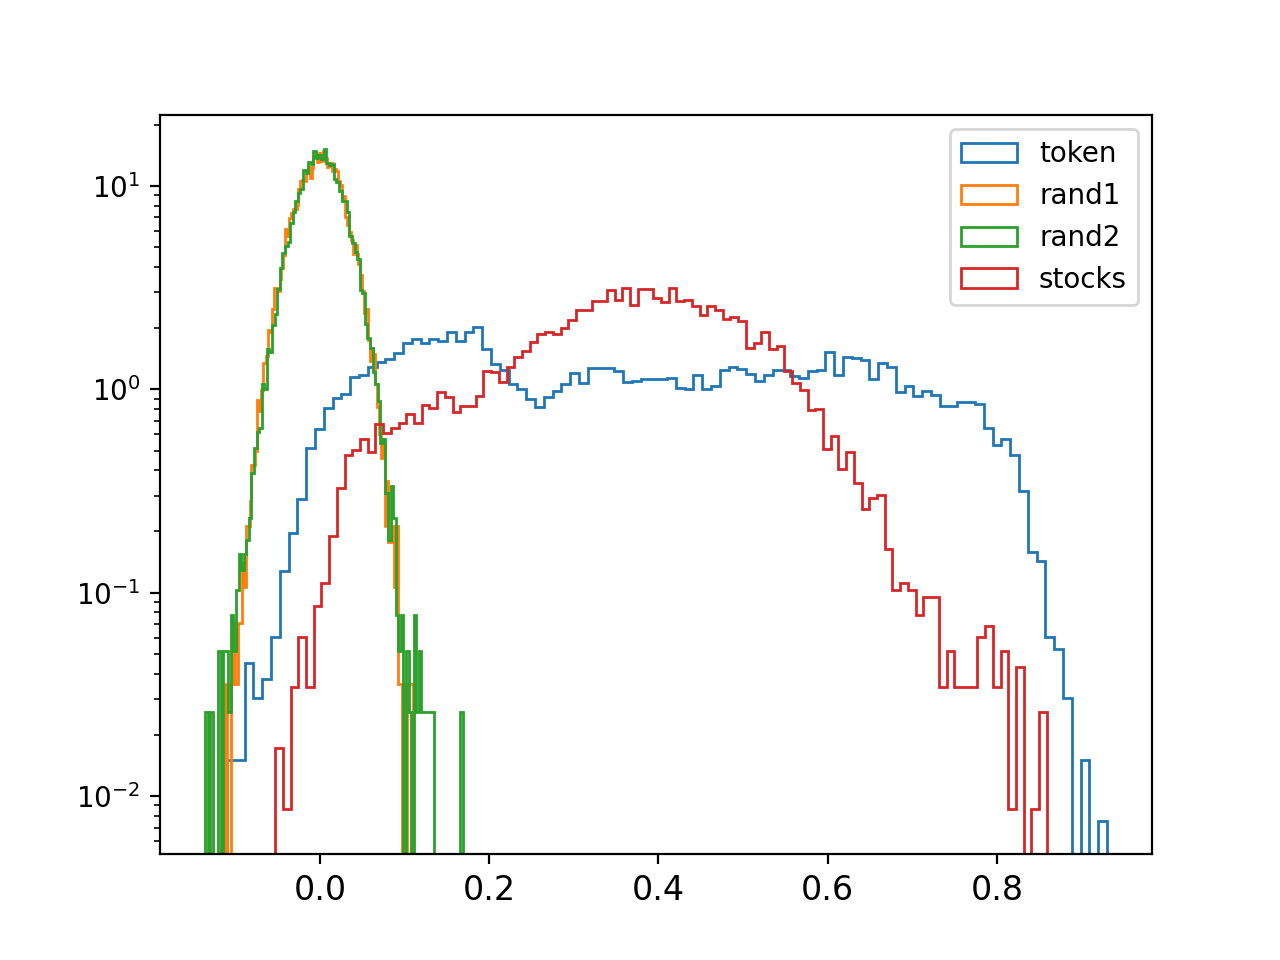

In [603]:
# Stock data: period is important.... looking at papers the graph looks a bit different
a = cb.to_numpy()[np.triu_indices(cb.shape[0],1)]
b = cn.to_numpy()[np.triu_indices(cn.shape[0],1)]
c = cn0.to_numpy()[np.triu_indices(cn0.shape[0],1)]
d = cs.to_numpy()[np.triu_indices(cs.shape[0],1)]

plt.hist(a,density=True,bins=100,log=True,histtype='step',label='token')
plt.hist(b,density=True,bins=100,log=True,histtype='step',label ='rand1')
plt.hist(c,density=True,bins=100,log=True,histtype='step',label='rand2')
plt.hist(d,density=True,bins=100,log=True,histtype='step',label='stocks')
plt.legend()
plt.show()

In [604]:
print(np.mean(d))
print(np.mean(a))

0.3655491207082575
0.3800972652430359


In [605]:
nn=200
ee = []
for i in range(nn):
    random_numbers = random.sample(range(H.shape[1]),rb.shape[1])
    cs = H.iloc[-rb.shape[0]:,random_numbers].corr()
    eva_s, evc_s = np.linalg.eig(cs)
    ee.append(eva_s)
    if i==0:
        eva_ss = eva_s
        continue
    eva_ss += eva_s
eva_ss /= nn
#np.mean(np.array(ee),axis=0)-eva_ss

In [606]:
m_e = np.mean(np.array(ee),axis=0)
s_e = np.std(np.array(ee),axis=0)
q_e2 = m_e+3*s_e/np.sqrt(nn)
q_e1 = m_e-3*s_e/np.sqrt(nn)

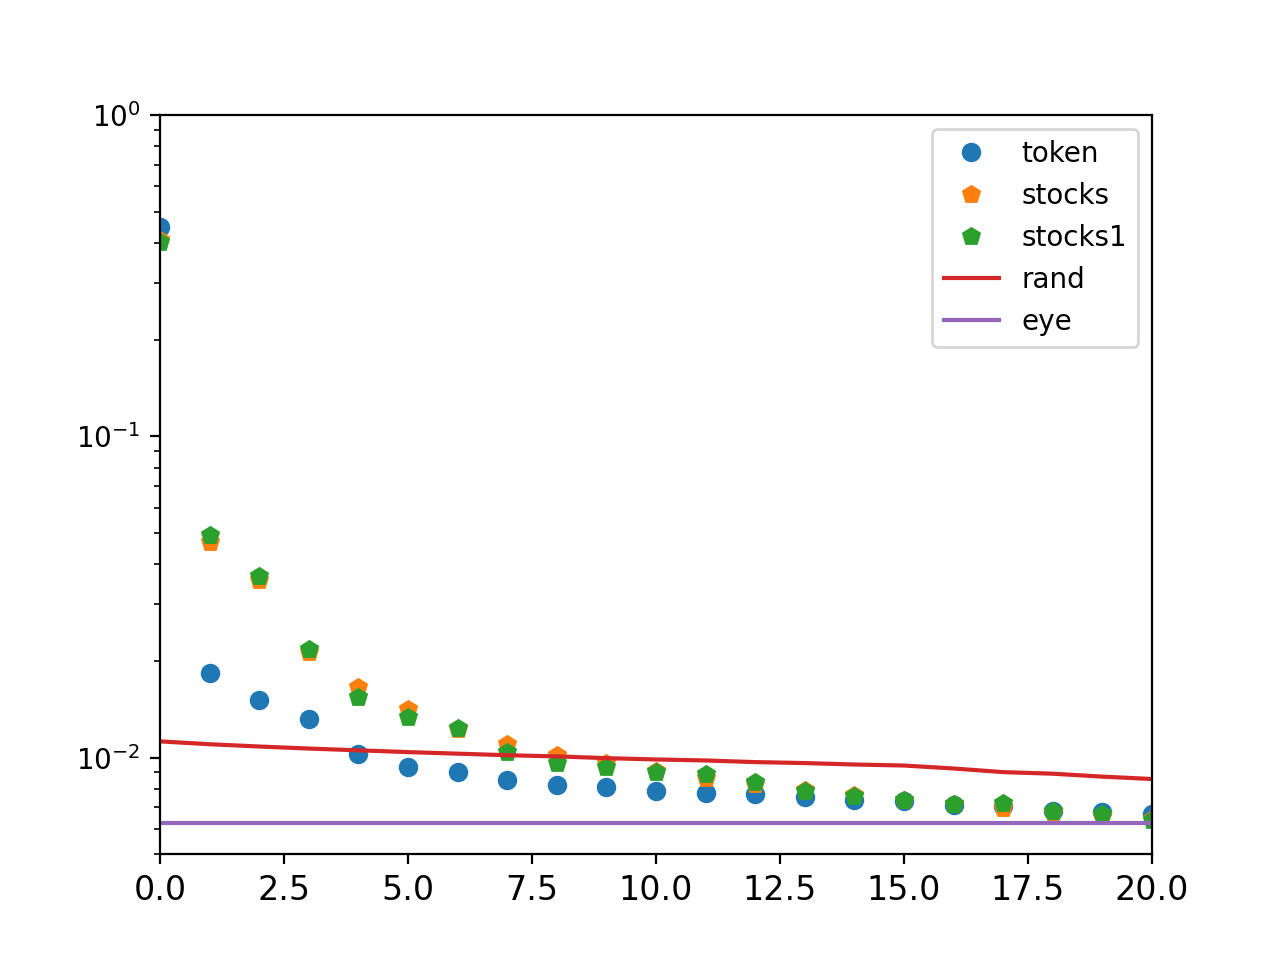

In [607]:
eva_t, evc_t = np.linalg.eig(cb)
eva_s, evc_s = np.linalg.eig(cs)
plt.semilogy(eva_t/np.sum(eva_t),'o',label='token')
plt.semilogy(q_e1/np.sum(q_e1),'p',label='stocks')
plt.semilogy(eva_s/np.sum(eva_s),'p',label='stocks1')
plt.semilogy(q_ec2/np.sum(q_ec2),label='rand')
#plt.semilogy(q_ec3/np.sum(q_ec3))
#plt.semilogy(eigenvalues_e0/np.sum(eigenvalues_e0))
plt.semilogy((0*eva_t+1)/np.sum(1+0*eva_t),label='eye')
#plt.semilogy((0*eva_t+2)/np.sum(2+0*eva_t))
plt.xlim(0,20)
plt.ylim(0.005,1)
plt.legend()
plt.show()

In [608]:
Q = rb.shape[0]/rb.shape[1]
#lb = np.arange(3.8,19.8,0.1)/10
lp = 1+(1/Q)+2*np.sqrt(1/Q)
ln = 1+(1/Q)-2*np.sqrt(1/Q)
lb = np.arange(np.ceil(100*ln)/100,np.floor(100*lp)/100,0.001)

Prob = (Q/(np.pi*2))*np.sqrt((lp-lb)*(lb-ln))/lb
print(lp)

1.8833580035768893


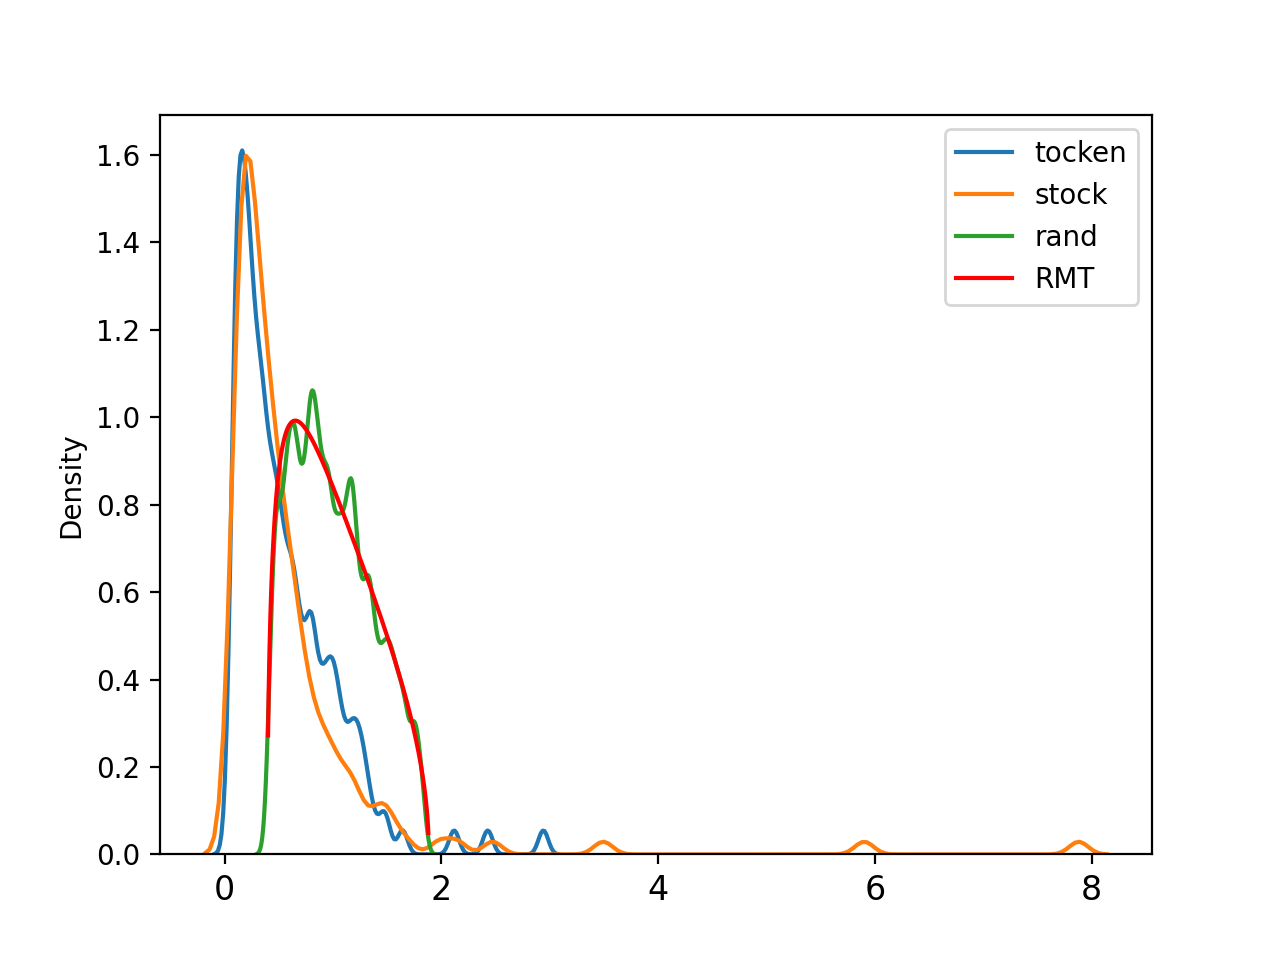

In [609]:
#sns.kdeplot(e_c,bw_method = 0.1)
sns.kdeplot(eva_t[1:],bw_method = 0.1,label='tocken')
sns.kdeplot(eva_s[1:],bw_method = 0.1,label='stock')
sns.kdeplot(eigenvalues_e0,bw_method = 0.1,label='rand')
#sns.histplot(e_c,bins=20)
plt.plot(lb,Prob,'r',label='RMT')
plt.legend()
plt.show()

In [610]:
np.sum(evc_t[:,0]<0)

0

In [611]:
np.sum(evc_t[:,0])

11.66391305636559

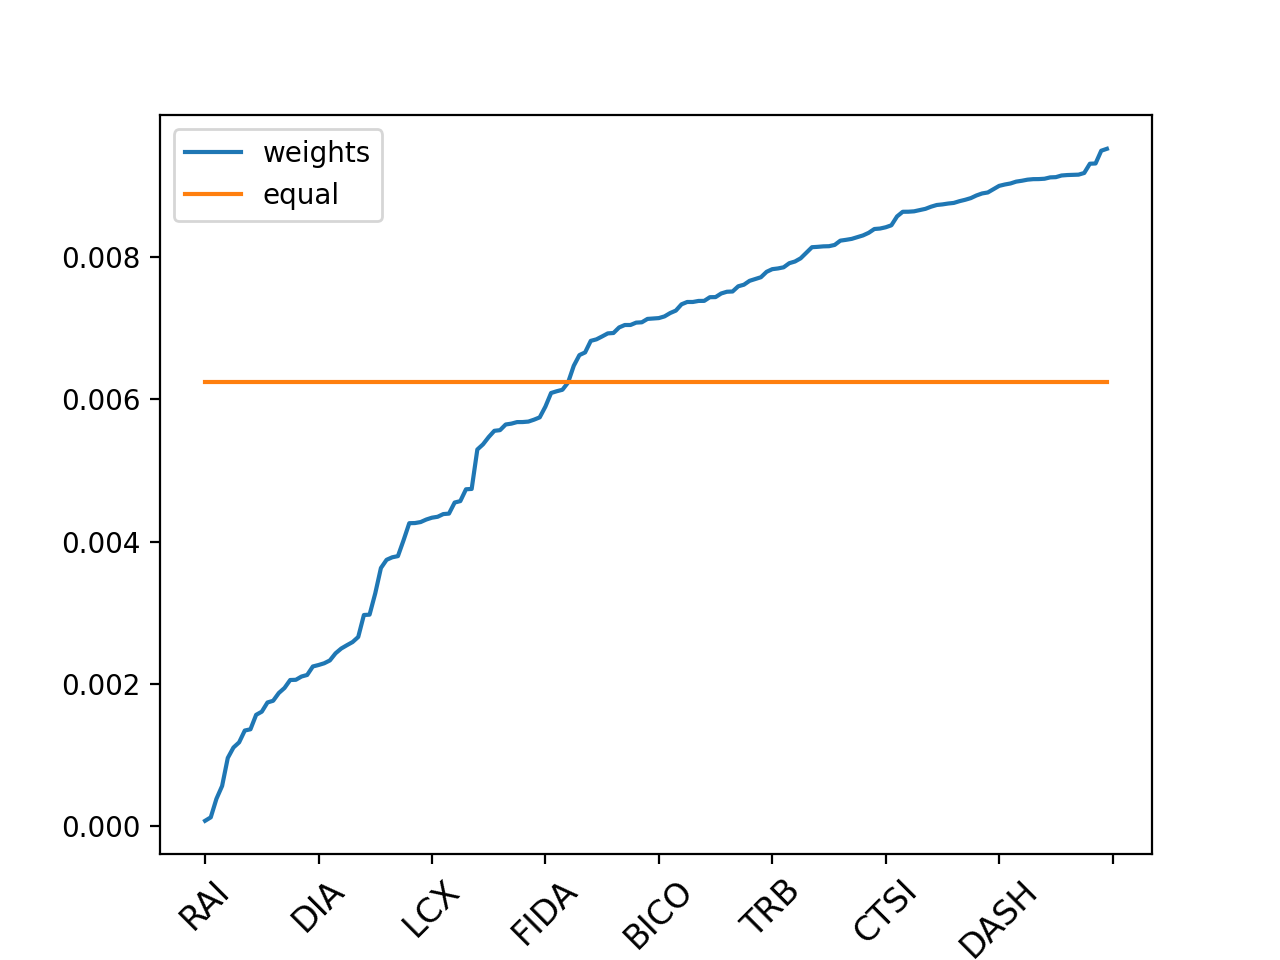

In [612]:
first_ev = pd.DataFrame({'coin':cb.columns,'weights': evc_t[:,0]/np.sum(evc_t[:,0])}).sort_values('weights')
first_ev['equal'] = 1/evc_t.shape[0]
first_ev.set_index('coin').plot()

#plt.plot(first_ev['coin'],first_ev['weights'])
#plt.plot(first_ev['coin'],(1+0*first_ev['weights'])/evc_t.shape[0])
plt.xticks(rotation=45)
plt.rc('xtick',labelsize=12)
plt.show()

In [613]:
first_ev.set_index('coin').loc['ETH',:]

weights    0.009317
equal      0.006250
Name: ETH, dtype: float64

In [614]:
first_ev.tail(10)

,coin,weights,equal
50,DOT,0.009125,0.00625
24,BAT,0.009148,0.00625
64,GALA,0.009155,0.00625
18,AVAX,0.009157,0.00625
98,NKN,0.009160,0.00625
27,BLZ,0.009184,0.00625
51,ENJ,0.009314,0.00625
56,ETH,0.009317,0.00625
90,MATIC,0.009496,0.00625
82,LINK,0.009524,0.00625


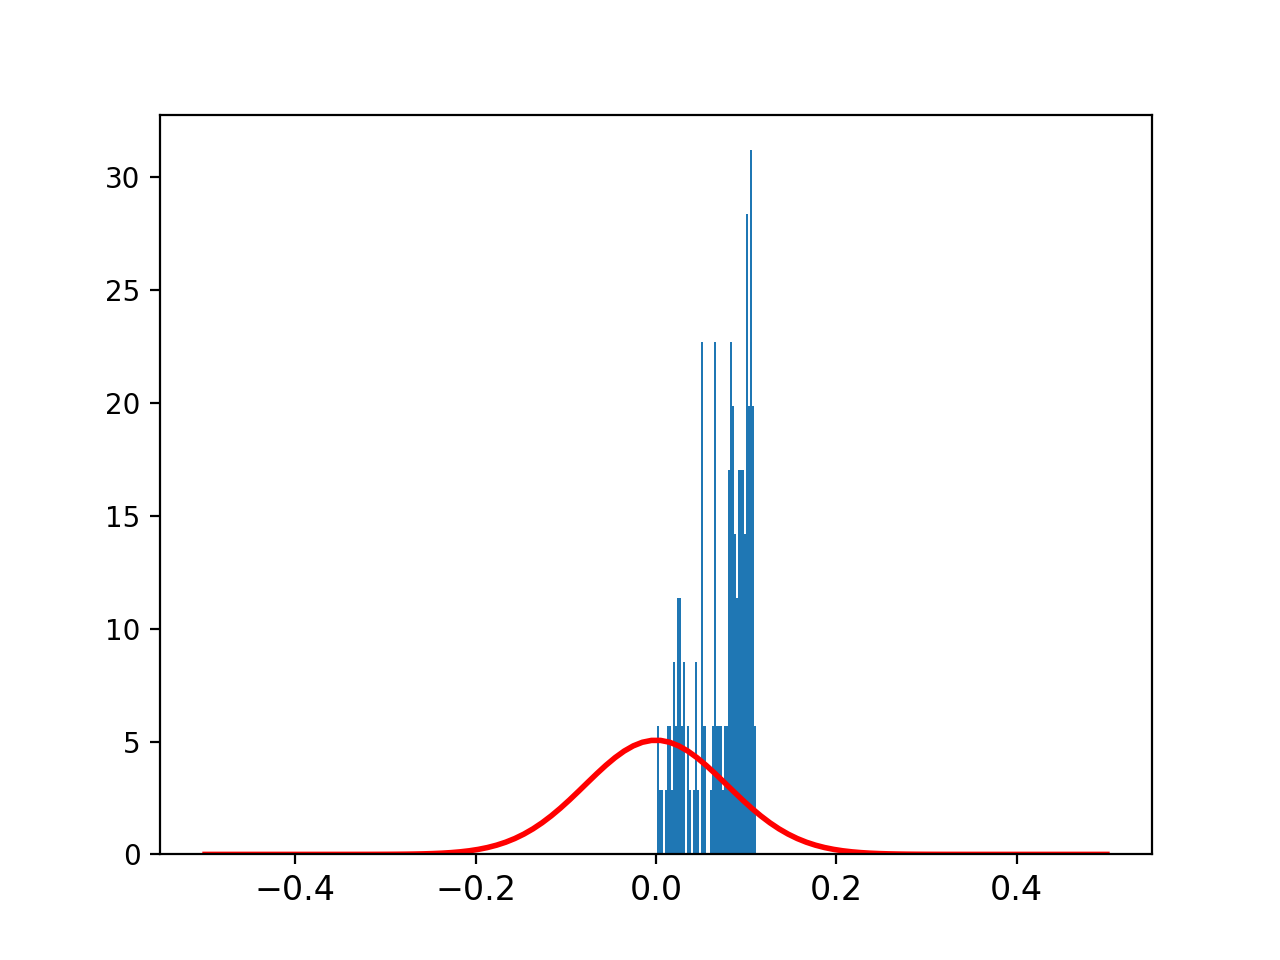

In [615]:
import scipy.stats as stats
z= np.linspace(-0.5, 0.5, 100)
plt.hist(evc_t[:,0],density=True,bins=50)
plt.plot(z, stats.norm.pdf(z,0,1/np.sqrt(161)), color='red', linewidth=2)
plt.show()

In [616]:
def getCdf(x):
    sx = np.sort(x)
    y = np.arange(1, len(x)+1) / (len(x) + 1)
    return {'x': sx, 'y': y}

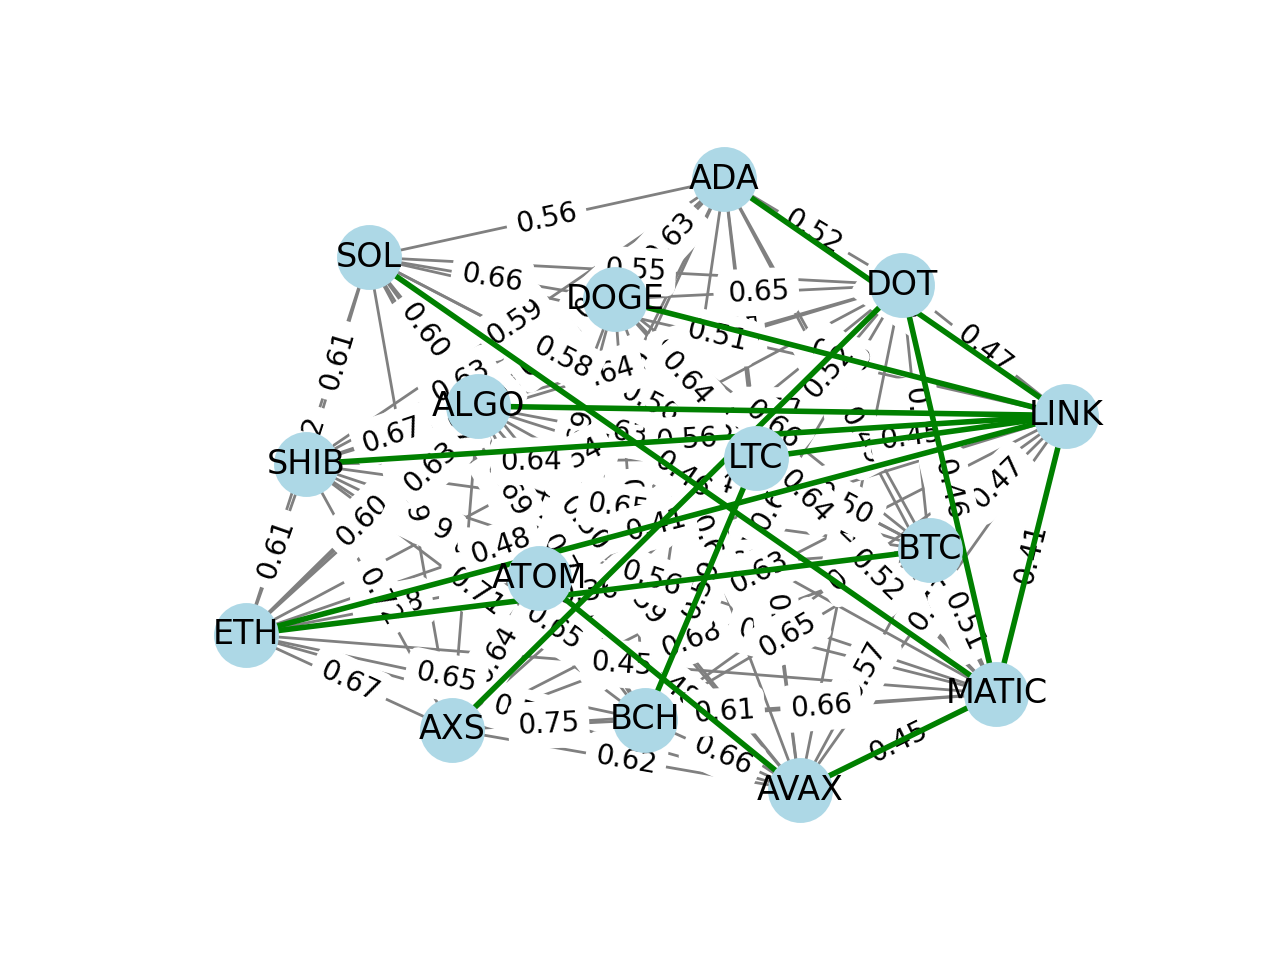

In [617]:
# Import libraries
import networkx as nx
#import pandas as pd
#import matplotlib.pyplot as plt

# Convert the correlation matrix to a distance matrix
# by subtracting it from 1
distance = np.sqrt(1 - cb2*cb2)

# Create a graph from the distance matrix
G = nx.from_pandas_adjacency(distance)

# Find the minimum spanning tree of the graph
T = nx.minimum_spanning_tree(G)

# Visualize the graph and the minimum spanning tree
pos = nx.spring_layout(G,center=(0,0)) # Set the layout of the nodes
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=500) # Draw the nodes
nx.draw_networkx_edges(G, pos, edge_color="grey") # Draw the edges
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif") # Draw the labels
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}) # Draw the edge weights
nx.draw_networkx_edges(T, pos, edge_color="green", width=2) # Draw the minimum spanning tree edges
plt.axis("off") # Hide the axis
plt.show() # Show the plot


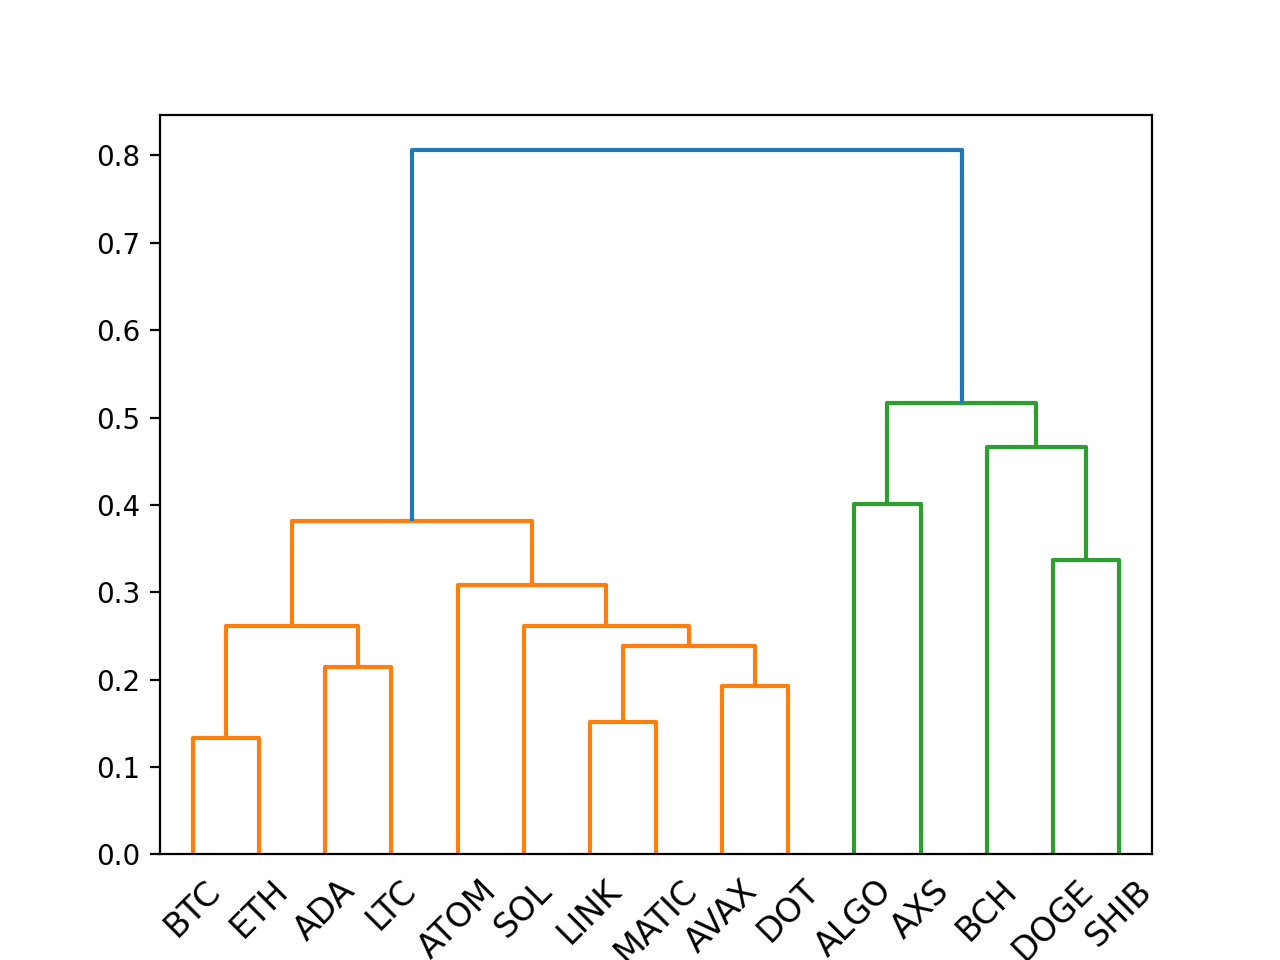

In [618]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Create a correlation matrix
corr_matrix = np.array([[1.0, 0.5, 0.2], [0.5, 1.0, 0.8], [0.2, 0.8, 1.0]])

# Compute the linkage matrix
linkage_matrix = linkage(cb2, method='ward')

# Plot the dendrogram
dendrogram(linkage_matrix,labels=cb2.columns)
plt.xticks(rotation=45)
# Show the plot
plt.show()


## References